! pip install transformers

In [1]:
from transformers import BertTokenizer, TFBertModel

In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [3]:
model = TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [4]:
text = "Replace me by any text you'd like."

In [5]:
encoded_input = tokenizer(text, return_tensors='tf')

In [6]:
encoded_input = tokenizer(text, return_tensors='tf')

In [7]:
output = model(encoded_input)

In [8]:
output

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(1, 12, 768), dtype=float32, numpy=
array([[[ 0.1386269 ,  0.15826848, -0.29666483, ..., -0.27084997,
         -0.28436327,  0.45808432],
        [ 0.5363637 , -0.23269694,  0.17542005, ...,  0.55402607,
          0.49807152, -0.00240741],
        [ 0.30023766, -0.3475117 ,  0.1208446 , ..., -0.45624888,
          0.32880193,  0.8772813 ],
        ...,
        [ 0.37986   ,  0.12028708,  0.8282931 , ..., -0.8623724 ,
         -0.59569657,  0.04711582],
        [-0.02524177, -0.71767557, -0.6950478 , ...,  0.0757423 ,
         -0.6667811 , -0.34007454],
        [ 0.7535382 ,  0.23910886,  0.07174474, ...,  0.2467156 ,
         -0.645806  , -0.32129756]]], dtype=float32)>, pooler_output=<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-0.93767875, -0.50425893, -0.9798931 ,  0.9030441 ,  0.9329326 ,
        -0.24377495,  0.8925757 ,  0.22880608, -0.9531208 , -0.99999535,
        -0.88623023,  0.990

In [9]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

! pip install -U sentence-transformers

In [10]:
import pandas as pd

In [11]:
data=pd.read_csv(r'D:\Customaise\data.csv')

In [12]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
data=data[data['Description'].notnull()]

In [15]:
from datetime import datetime, date, time

In [16]:
data['InvoiceDate']=data['InvoiceDate'].apply(lambda x: x[:10])

In [17]:
a=[]
for i in data['Description'].unique():
    if(len(i.split())==1):
        a.append(i)

In [18]:
for i in a:
    data=data[data['Description']!=i]

In [19]:
df=data.copy()

In [20]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  
0       12-01-2010       2.55     17850.0  United Kingdom  
1       12-01-2010       3.39     17850.0  United Kingdom  
2       12-01-2010       2.75     17850.0  United Kingdom  
3       12-01-2010       3.39     17850.0  United Kingdom  
4       12-01-2010       3.39     17850.0  United Kingdom  
...            ...        ...         ...             ...  
541904  12-09-2011       0.85     12680.0          France  
541905  12-09-2011       2.10     12680.0          France  
541906  12-09-2011       4.15     12680.0          France  
541907  12-09-2011       4.15     12680.0          France  
541908  12-09-2011       4.95     12680.0          France  

[537820 rows x 8 columns]

In [21]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [22]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  
0       2010-12-01       2.55     17850.0  United Kingdom  
1       2010-12-01       3.39     17850.0  United Kingdom  
2       2010-12-01       2.75     17850.0  United Kingdom  
3       2010-12-01       3.39     17850.0  United Kingdom  
4       2010-12-01       3.39     17850.0  United Kingdom  
...            ...        ...         ...             ...  
541904  2011-12-09       0.85     12680.0          France  
541905  2011-12-09       2.10     12680.0          France  
541906  2011-12-09       4.15     12680.0          France  
541907  2011-12-09       4.15     12680.0          France  
541908  2011-12-09       4.95     12680.0          France  

[537820 rows x 8 columns]

In [23]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

! pip install torch

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [25]:
df['Description']=df['Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [26]:
df['Description']=df['Description'].apply(lambda x: ''.join(i for i in x if not i.isdigit()))

In [27]:
df['Description']=df['Description'].str.replace('[^\w\s]','')

In [28]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [29]:
df['Description']=df['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop ))

In [30]:
from textblob import Word

In [31]:
df['Description']=df['Description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [32]:
df_copy=df.copy()

In [33]:
df[df['Description'].duplicated(keep=False)].sort_values('Description')

InvoiceNo StockCode                       Description  Quantity  \
161180    550471     23176             abc treasure book box         1   
184220    552678     23176             abc treasure book box         1   
459568    575875     23176             abc treasure book box         1   
376985    569544     23176             abc treasure book box         1   
195004    553685     23176             abc treasure book box         8   
...          ...       ...                               ...       ...   
391139    570653     23137  zinc wire sweetheart letter tray         1   
197076    553889     23137  zinc wire sweetheart letter tray         4   
481874    577361     23137  zinc wire sweetheart letter tray         4   
193777    553543     23137  zinc wire sweetheart letter tray         1   
516334    579885     23137  zinc wire sweetheart letter tray         1   

       InvoiceDate  UnitPrice  CustomerID         Country  
161180  2011-04-18       4.58         NaN  United Kingdom  
184220  2011-05-10       4.58         NaN  United Kingdom  
459568  2011-11-11       4.58         NaN  United Kingdom  
376985  2011-10-04       4.58         NaN  United Kingdom  
195004  2011-05-18       2.25     18097.0  United Kingdom  
...            ...        ...         ...             ...  
391139  2011-10-11       3.75     14710.0  United Kingdom  
197076  2011-05-19       3.75     13405.0  United Kingdom  
481874  2011-11-18       3.75     13012.0  United Kingdom  
193777  2011-05-17       7.46         NaN  United Kingdom  
516334  2011-11-30       3.75     15444.0  United Kingdom  

[537591 rows x 8 columns]

In [34]:
df = df.drop_duplicates('Description')

In [35]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A    white hanging heart tlight holder         6   
1         536365     71053                  white metal lantern         6   
2         536365    84406B        cream cupid heart coat hanger         8   
3         536365    84029G  knitted union flag hot water bottle         6   
4         536365    84029E        red woolly hottie white heart         6   
...          ...       ...                                  ...       ...   
527065    580691    90214U              letter u bling key ring        12   
532724    580991     22481                              wet box      -288   
535329    581206     21693                                mixed       -87   
537621    581334    85123A    cream hanging heart tlight holder         4   
540421    581483     23843            paper craft little birdie     80995   

       InvoiceDate  UnitPrice  CustomerID         Country  
0       2010-12-01       2.55     17850.0  United Kingdom  
1       2010-12-01       3.39     17850.0  United Kingdom  
2       2010-12-01       2.75     17850.0  United Kingdom  
3       2010-12-01       3.39     17850.0  United Kingdom  
4       2010-12-01       3.39     17850.0  United Kingdom  
...            ...        ...         ...             ...  
527065  2011-12-05       0.29     13790.0  United Kingdom  
532724  2011-12-06       0.00         NaN  United Kingdom  
535329  2011-12-07       0.00         NaN  United Kingdom  
537621  2011-12-08       2.95     17841.0  United Kingdom  
540421  2011-12-09       2.08     16446.0  United Kingdom  

[4018 rows x 8 columns]

In [36]:
corpus=df['Description'].tolist()

In [37]:
corpus_embeddings = embedder.encode(corpus)

In [38]:
corpus_embeddings

array([[ 0.48920038, -0.8172403 ,  0.18209566, ...,  0.3816783 ,
        -1.1426334 ,  0.21332729],
       [ 0.3140758 , -0.704549  ,  0.53417623, ...,  0.68327844,
        -0.3678943 ,  0.18624656],
       [-0.5746175 , -0.27549353,  0.2516321 , ...,  0.01565526,
        -0.5627071 ,  1.3498551 ],
       ...,
       [-0.35753778, -0.14306627, -0.56960505, ..., -0.10917777,
        -0.30159953,  0.30119547],
       [-0.5256491 , -0.18739936,  0.29818594, ..., -0.11495918,
        -0.9606535 ,  0.55325204],
       [-0.69098157, -0.30758414, -0.79425603, ...,  0.41691524,
         0.6325307 ,  0.2600839 ]], dtype=float32)

In [39]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
best_clusters = 0 # best cluster number which you will get
previous_silh_avg = 0.0
for n_clusters in range(40,51):
    clusterer = KMeans(n_clusters, init='k-means++', random_state=1)
    cluster_labels = clusterer.fit_predict(corpus_embeddings)
    silhouette_avg = silhouette_score(corpus_embeddings, cluster_labels, sample_size=3000)
    if silhouette_avg > previous_silh_avg:
        previous_silh_avg = silhouette_avg
        best_clusters = n_clusters
print("No of Clusters:", best_clusters)

No of Clusters: 48


In [40]:
num_clusters = best_clusters  
km = KMeans(n_clusters=num_clusters, init='k-means++', random_state=1)  
km.fit(corpus_embeddings)  
clusters = km.labels_.tolist()  
df['ClusterID'] = clusters  
print("Cluster Count")
print(df['ClusterID'].value_counts())

Cluster Count
6     157
8     134
22    131
24    126
46    125
13    122
23    121
18    116
45    111
42    105
14    104
29    102
15     96
36     95
19     94
3      93
47     93
37     92
33     88
9      88
26     87
35     86
17     86
20     84
39     81
12     79
21     77
1      77
16     77
2      75
44     69
7      67
5      67
43     66
32     66
40     62
41     61
11     60
0      60
10     59
25     53
30     50
38     50
4      50
34     47
28     44
27     43
31     42
Name: ClusterID, dtype: int64


In [41]:
cluster_assignment=km.labels_

In [42]:
cluster_assignment

array([37, 37, 33, ..., 40, 33, 44])

In [43]:
clustered_sentences = [[] for i in range(best_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['home building block word', 'doormat new england', 'doormat fancy font home sweet home', 'family photo frame cornice', 'doormat topiary', 'doormat heart', 'doormat union jack gun rose', 'tray breakfast bed', 'english rose spirit level', 'doormat spotty home sweet home', 'doormat english rose', 'doormat union flag', 'doormat welcome puppy', 'toast best mum', 'beach hut key cabinet', 'doormat airmail', 'doormat smiley cat', 'magnet pack home sweet home', 'home sweet home metal sign', 'key fob garage design', 'doormat welcome home', 'poppy playhouse livingroom', 'wall tidy blue office', 'home sweet home mug', 'doormat respectable house', 'charlielola room door sign', 'keep boy door hanger', 'hen house decoration', 'memo board cottage design', 'key fob front door', 'key fob back door', 'doormat neighbourhood witch', 'hall cabinet drawer', 'doormat home sweet home blue', 'hen house w chick standing', 'doormat welcome sunrise', 'doormat friendship', 'door hanger mum dad room', 'd

In [44]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A    white hanging heart tlight holder         6   
1         536365     71053                  white metal lantern         6   
2         536365    84406B        cream cupid heart coat hanger         8   
3         536365    84029G  knitted union flag hot water bottle         6   
4         536365    84029E        red woolly hottie white heart         6   
...          ...       ...                                  ...       ...   
527065    580691    90214U              letter u bling key ring        12   
532724    580991     22481                              wet box      -288   
535329    581206     21693                                mixed       -87   
537621    581334    85123A    cream hanging heart tlight holder         4   
540421    581483     23843            paper craft little birdie     80995   

       InvoiceDate  UnitPrice  CustomerID         Country  ClusterID  
0       2010-12-01       2.55     17850.0  United Kingdom         37  
1       2010-12-01       3.39     17850.0  United Kingdom         37  
2       2010-12-01       2.75     17850.0  United Kingdom         33  
3       2010-12-01       3.39     17850.0  United Kingdom         43  
4       2010-12-01       3.39     17850.0  United Kingdom         24  
...            ...        ...         ...             ...        ...  
527065  2011-12-05       0.29     13790.0  United Kingdom         14  
532724  2011-12-06       0.00         NaN  United Kingdom         43  
535329  2011-12-07       0.00         NaN  United Kingdom         40  
537621  2011-12-08       2.95     17841.0  United Kingdom         33  
540421  2011-12-09       2.08     16446.0  United Kingdom         44  

[4018 rows x 9 columns]

In [45]:
for i in range(best_clusters):
    x=df[df['ClusterID']==i]['Description'].unique()
    globals()['data_%s' % i] = pd.DataFrame()
    for j in x:
        globals()['data_%s' % i]=pd.concat([globals()['data_%s' % i],df_copy[df_copy['Description']==j]],axis=0)

In [46]:
for i in range(best_clusters):
    globals()['data_%s' % i]=globals()['data_%s' % i].sort_values(by='InvoiceDate')
    globals()['data_%s' % i]=globals()['data_%s' % i].drop(columns=['InvoiceNo','StockCode','Description','UnitPrice','CustomerID','Country'],axis=1)
    globals()['data_%s' % i]=globals()['data_%s' % i].reset_index()
    globals()['data_%s' % i]=globals()['data_%s' % i].drop(columns=['index'],axis=1)
    

In [47]:
for i in range(best_clusters):
    globals()['data_%s' % i]=pd.DataFrame(globals()['data_%s' % i].groupby('InvoiceDate').Quantity.mean()).reset_index()

In [48]:
for i in range(best_clusters):
    globals()['data_%s' % i]['Quantity']=globals()['data_%s' % i]['Quantity'].apply(lambda x: round(x))

In [49]:
data_0

InvoiceDate  Quantity
0    2010-12-01         3
1    2010-12-02        10
2    2010-12-03         3
3    2010-12-05         3
4    2010-12-06         2
..          ...       ...
300  2011-12-05         3
301  2011-12-06         3
302  2011-12-07         6
303  2011-12-08         3
304  2011-12-09        13

[305 rows x 2 columns]

In [50]:
for i in range(best_clusters):
    globals()['data_%s' % i]=globals()['data_%s' % i][globals()['data_%s' % i]['Quantity']>0]
    globals()['data_%s' % i]=globals()['data_%s' % i].reset_index()
    globals()['data_%s' % i]=globals()['data_%s' % i].drop(columns=['index'],axis=1)

In [51]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data_1.Quantity.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.424737
p-value: 0.000003


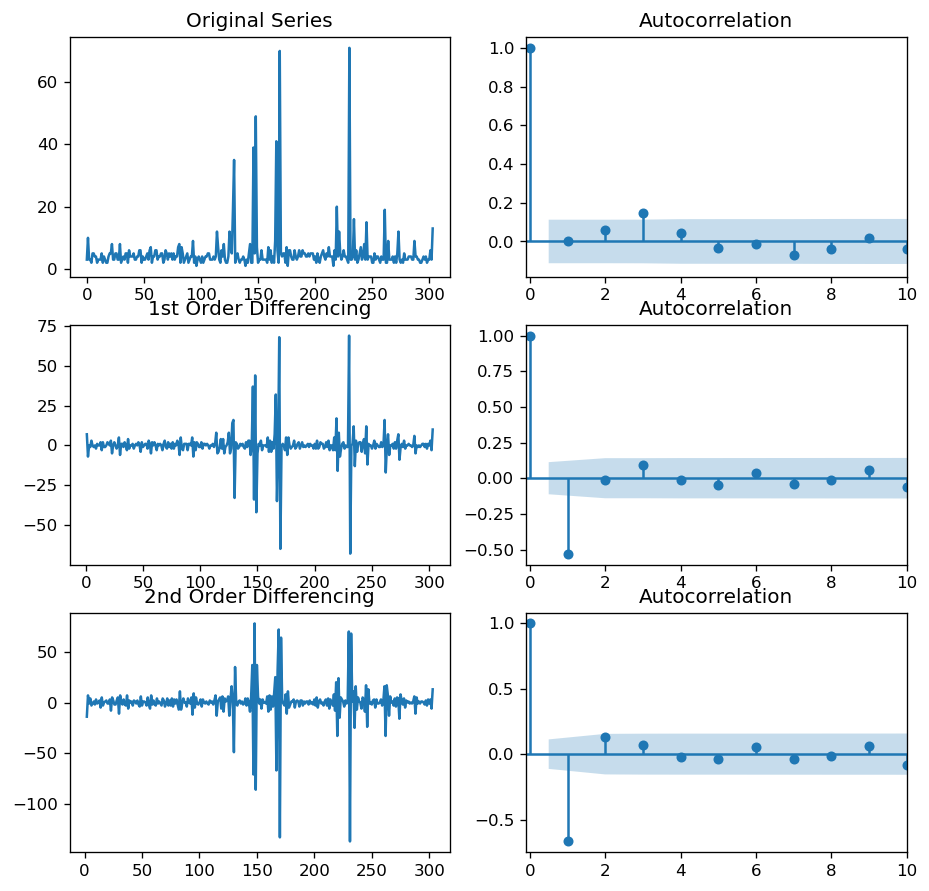

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,9), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(data_0.Quantity); axes[0, 0].set_title('Original Series')
axes[0,1].set(xlim=(-0.1,10))
plot_acf(data_0.Quantity, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data_0.Quantity.diff()); axes[1, 0].set_title('1st Order Differencing')
axes[1,1].set(xlim=(-0.1,10))
plot_acf(data_0.Quantity.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data_0.Quantity.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
axes[2,1].set(xlim=(-0.1,10))
plot_acf(data_0.Quantity.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

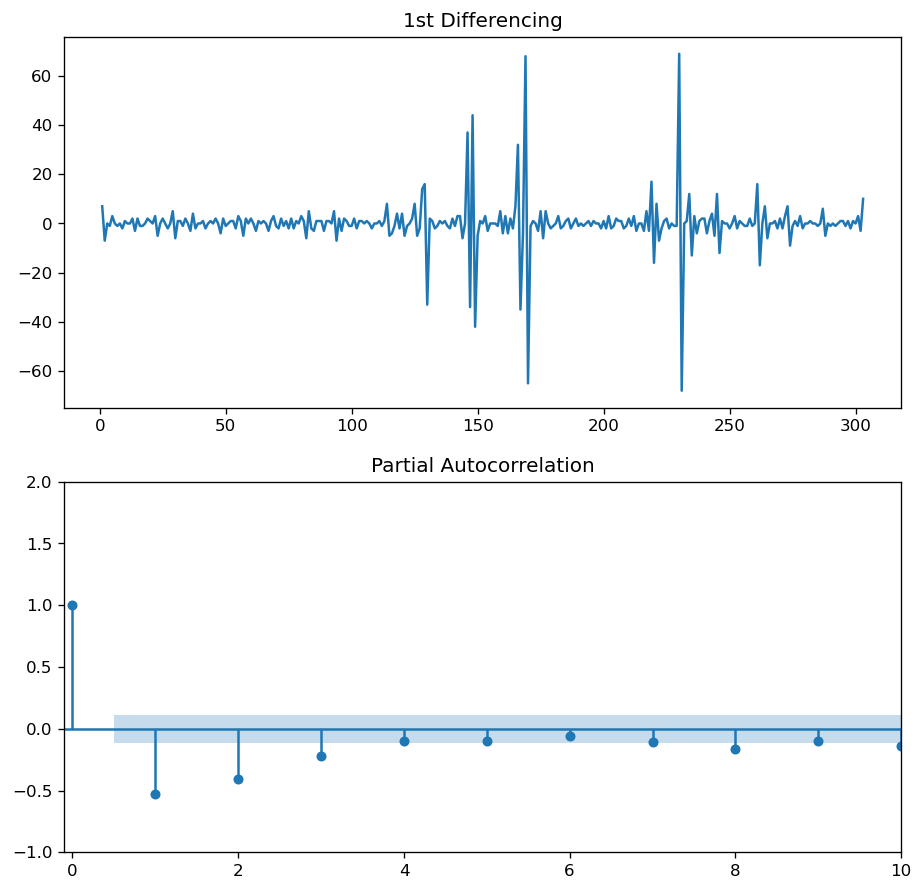

In [53]:
plt.rcParams.update({'figure.figsize':(9,9), 'figure.dpi':120})

fig, axes = plt.subplots(2, 1, sharex=False)
axes[0].plot(data_0.Quantity.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(-1,2))
axes[1].set(xlim=(-0.1,10))
plot_pacf(data_0.Quantity.diff().dropna(), ax=axes[1])

plt.show()

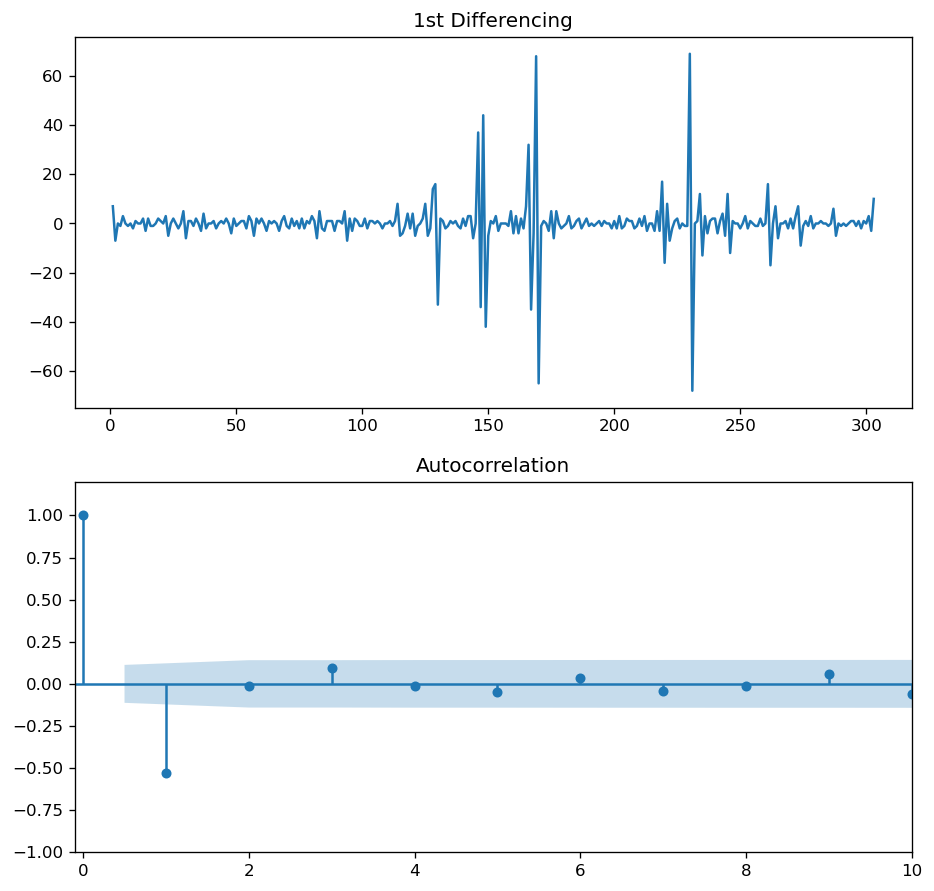

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,9), 'figure.dpi':120})

fig, axes = plt.subplots(2, 1, sharex=False)
axes[0].plot(data_0.Quantity.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(-1,1.2))
axes[1].set(xlim=(-0.1,10))
plot_acf(data_0.Quantity.diff().dropna(), ax=axes[1])
plt.show()

In [55]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(data_0.Quantity, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:               Quantity   No. Observations:                  304
Model:                     ARMA(1, 1)   Log Likelihood               -1031.442
Method:                       css-mle   S.D. of innovations              7.179
Date:                Tue, 28 Dec 2021   AIC                           2070.885
Time:                        19:29:16   BIC                           2085.753
Sample:                             0   HQIC                          2076.832
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.2096      0.421     12.369      0.000       4.384       6.035
ar.L1.Quantity    -0.9537      0.027    -35.417      0.000      -1.006      -0.901
ma.L1.Quantity     0.9987      0.057

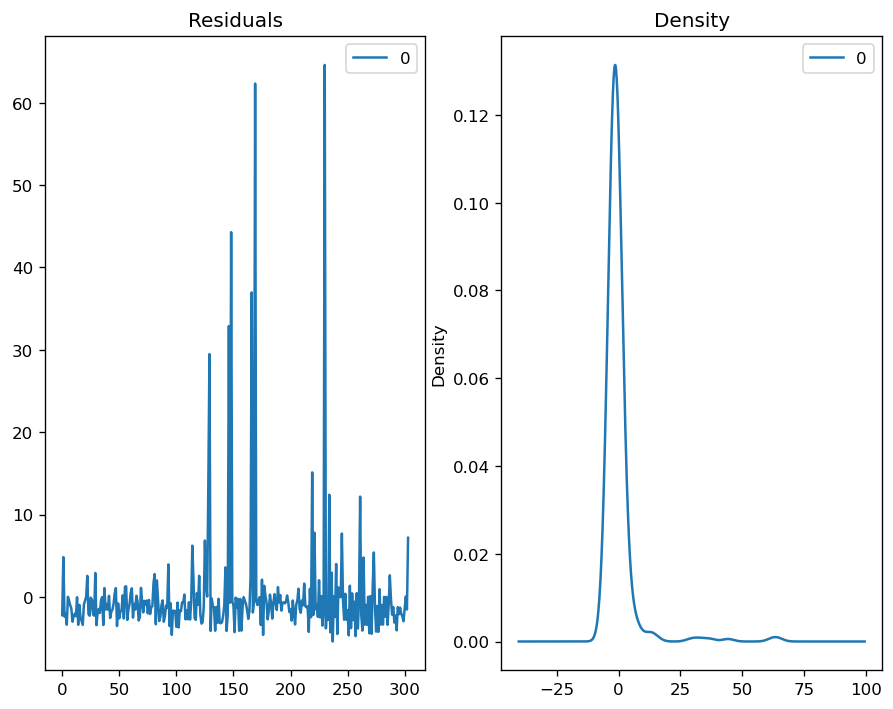

In [56]:
residuals = pd.DataFrame(model_fit.resid)
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

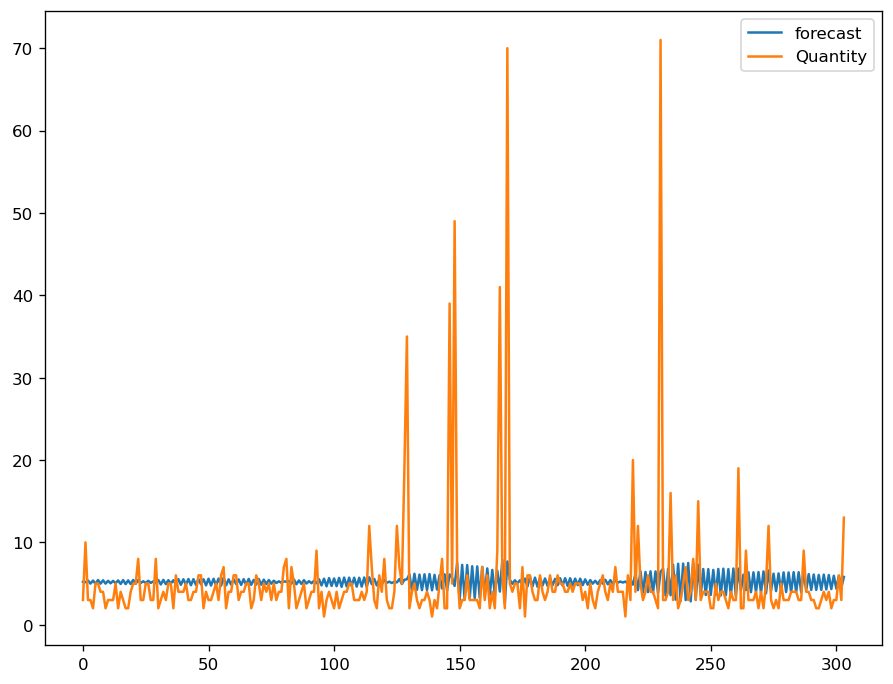

In [57]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [58]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data_0.Quantity[:data_0.shape[0]-50]
test = data_0.Quantity[data_0.shape[0]-50:]

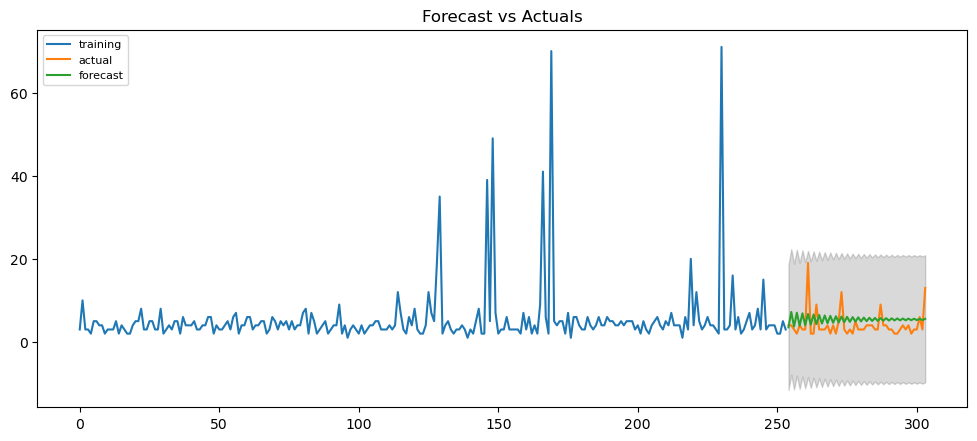

In [59]:
model = ARIMA(train, order=(1, 0, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(50, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [60]:
import numpy as np
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.8227936254532131,
 'me': 1.2822772891565801,
 'mae': 2.6820924096624235,
 'mpe': 0.7068743337085597,
 'rmse': 3.3841441343432797,
 'acf1': -0.11646127748798418,
 'corr': 0.11612074377964354,
 'minmax': 0.40767522653938226}

In [61]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(data_0.Quantity, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2078.617, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2196.501, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2161.586, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2174.645, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2080.513, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2080.522, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2162.522, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2135.407, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2074.733, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2074.294, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2072.294, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2074.294, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.713 seconds
                           

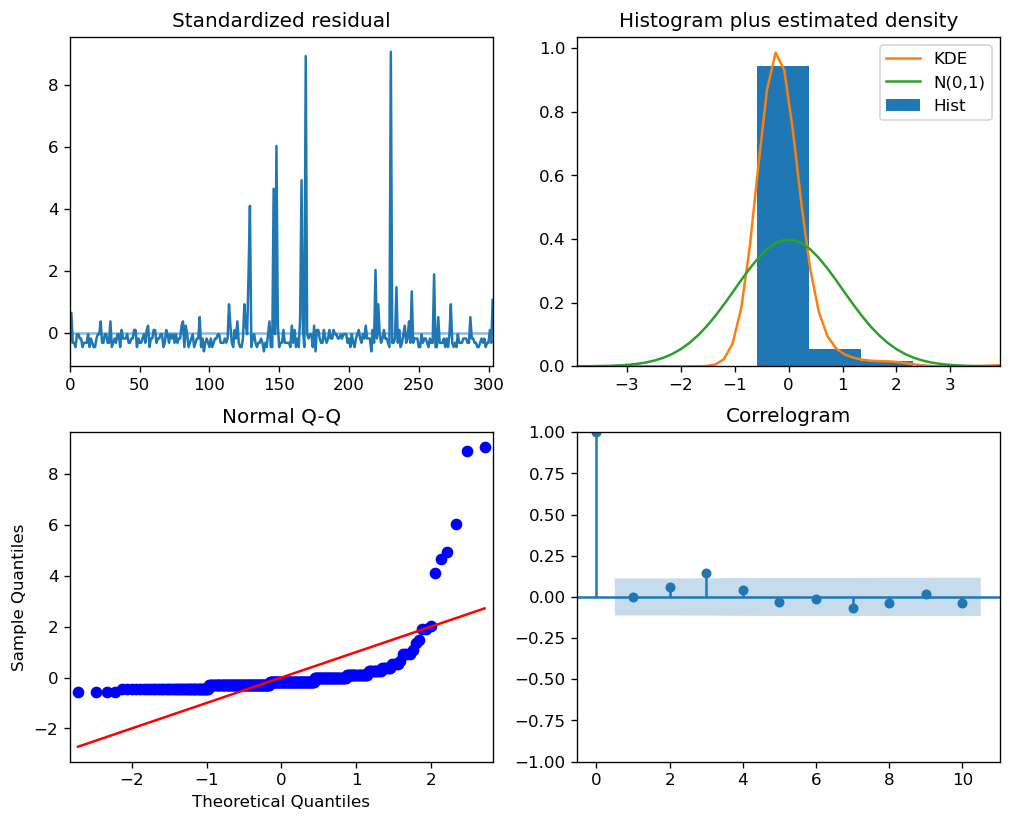

In [62]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

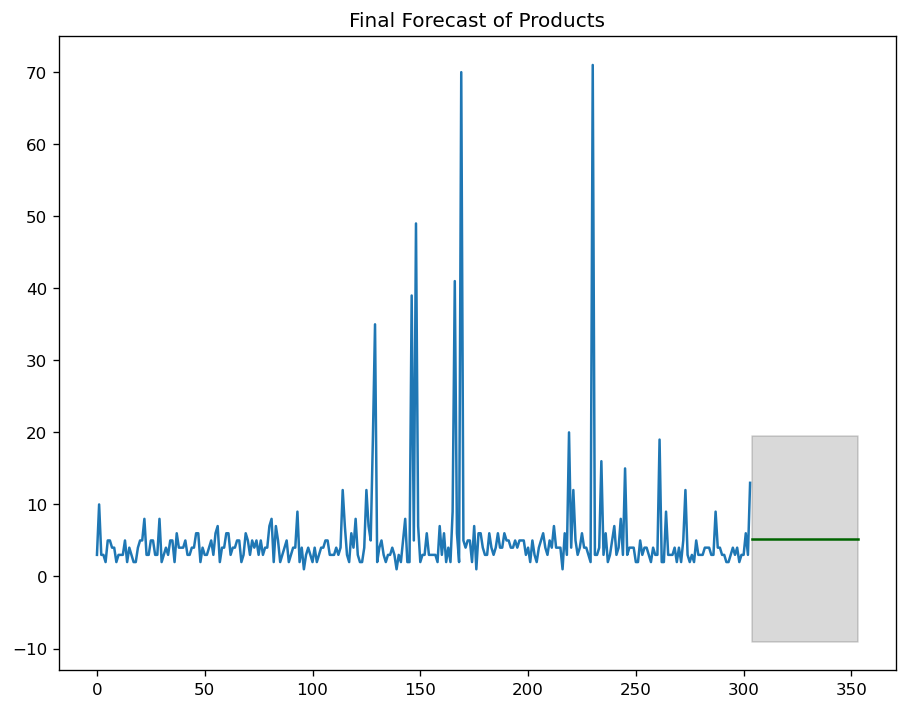

In [63]:
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(data_0.Quantity), len(data_0.Quantity)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data_0.Quantity)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Products")
plt.show()

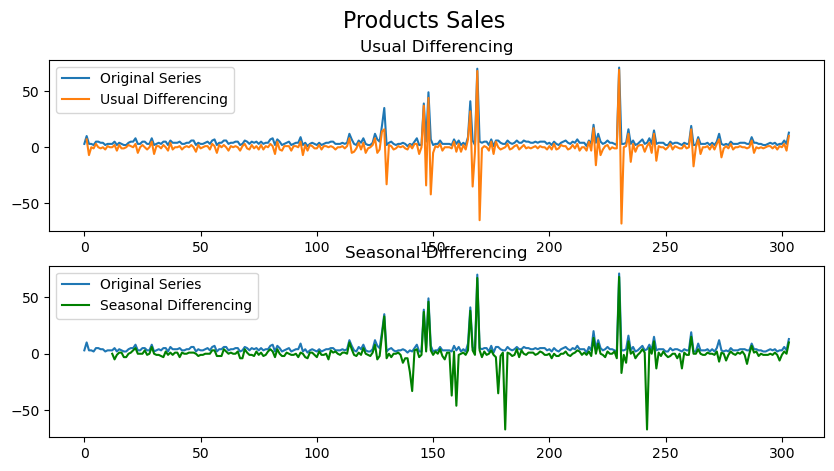

In [64]:
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=False)

# Usual Differencing
axes[0].plot(data_0.Quantity[:], label='Original Series')
axes[0].plot(data_0.Quantity[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data_0.Quantity[:], label='Original Series')
axes[1].plot(data_0.Quantity[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Products Sales', fontsize=16)
plt.show()

In [65]:
import pmdarima as pm

In [66]:
def f_model(data):
    smodel = pm.auto_arima(data.Quantity, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
    
    return smodel

In [67]:
def forecast_m(model,data):
    n_periods = 30
    fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(data.InvoiceDate[data.shape[0]-1], periods = n_periods, freq='D')

# make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
    plt.plot(data.InvoiceDate,data.Quantity)
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

    plt.title("SARIMA - Final Forecast of Products Sales - Time Series Dataset")
    plt.xticks(rotation=45)
    plt.show()
    
    return fitted_series

In [68]:
for i in range(best_clusters):
    print(globals()['data_%s' % i].shape[0])

304
303
301
305
302
172
304
305
302
298
304
303
305
305
305
305
304
304
303
298
303
304
302
305
305
301
304
277
304
305
303
305
302
305
302
303
303
301
301
305
268
305
305
302
303
304
300
304


In [69]:
for i in range(best_clusters):
    globals()['smodel_%s' % i]=f_model(globals()['data_%s' % i])

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.57 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2217.510, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2134.398, Time=0.61 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2215.510, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2219.379, Time=0.17 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2104.934, Time=1.29 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.49 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2103.055, Time=0.95 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2132.926, Time=0.85 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.88 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2104.949, Time=1.48 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=inf, T

 ARIMA(0,0,1)(1,1,0)[12]             : AIC=2233.781, Time=0.40 sec
 ARIMA(0,0,1)(2,1,1)[12]             : AIC=inf, Time=4.44 sec
 ARIMA(0,0,1)(1,1,1)[12]             : AIC=inf, Time=2.60 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=2211.570, Time=0.59 sec
 ARIMA(1,0,1)(2,1,0)[12]             : AIC=2211.049, Time=1.10 sec
 ARIMA(0,0,2)(2,1,0)[12]             : AIC=2211.423, Time=0.82 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=2210.393, Time=0.67 sec
 ARIMA(1,0,2)(2,1,0)[12]             : AIC=2213.035, Time=2.36 sec

Best model:  ARIMA(0,0,1)(2,1,0)[12]          
Total fit time: 50.251 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1208.166, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1168.177, Time=0.50 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1206.171, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] in

 ARIMA(1,0,0)(0,1,1)[12]             : AIC=2036.901, Time=0.76 sec
 ARIMA(0,0,1)(0,1,1)[12]             : AIC=2036.904, Time=0.61 sec
 ARIMA(1,0,1)(0,1,1)[12]             : AIC=2036.047, Time=0.97 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.04 sec

Best model:  ARIMA(0,0,0)(0,1,1)[12]          
Total fit time: 33.906 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2221.675, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2121.665, Time=0.77 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2219.680, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2220.075, Time=0.28 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2072.621, Time=1.86 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=2045.166, Time=2.11 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=2043.220, Time=1.00 sec
 ARIMA(1,0,0)(0,1,1)[1

 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.36 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2493.890, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2424.106, Time=0.77 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2491.890, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2495.624, Time=0.27 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2394.434, Time=1.81 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.78 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2392.640, Time=1.41 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2422.125, Time=1.25 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.81 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2394.456, Time=1.80 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2396.399, Time=3.67 sec
 ARIMA(0,0,0)(2,1,0)[12] 

 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2152.467, Time=0.94 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.14 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2129.305, Time=1.73 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2130.823, Time=2.55 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=2125.398, Time=0.45 sec
 ARIMA(0,0,0)(1,1,0)[12]             : AIC=2150.470, Time=0.22 sec
 ARIMA(0,0,0)(2,1,1)[12]             : AIC=inf, Time=2.57 sec
 ARIMA(0,0,0)(1,1,1)[12]             : AIC=inf, Time=1.12 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=2127.288, Time=0.56 sec
 ARIMA(0,0,1)(2,1,0)[12]             : AIC=2127.306, Time=0.60 sec
 ARIMA(1,0,1)(2,1,0)[12]             : AIC=2128.824, Time=1.28 sec

Best model:  ARIMA(0,0,0)(2,1,0)[12]          
Total fit time: 31.689 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(0,0,0)(0,1,0)[12] interce

 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1918.989, Time=0.70 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1988.313, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1992.230, Time=0.22 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1883.446, Time=1.54 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1848.235, Time=2.19 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1846.481, Time=1.03 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=5.73 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=1846.477, Time=1.82 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1844.492, Time=1.58 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=4.60 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1844.496, Time=0.74 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1846.476, Time=1.98 sec
 ARIMA(1,0,1)(0,1,2)

 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2158.053, Time=0.53 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2157.027, Time=0.40 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2180.523, Time=0.29 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2157.893, Time=0.43 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2158.408, Time=0.91 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=2155.093, Time=0.17 sec
 ARIMA(0,0,0)(1,1,0)[12]             : AIC=2178.535, Time=0.07 sec
 ARIMA(0,0,0)(2,1,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(1,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=2156.126, Time=0.20 sec
 ARIMA(0,0,1)(2,1,0)[12]             : AIC=2155.968, Time=0.24 sec
 ARIMA(1,0,1)(2,1,0)[12] 

 ARIMA(0,0,1)(2,1,0)[12]             : AIC=2517.427, Time=0.24 sec
 ARIMA(0,0,1)(1,1,0)[12]             : AIC=2542.870, Time=0.13 sec
 ARIMA(0,0,1)(2,1,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(0,0,1)(1,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=2517.871, Time=0.17 sec
 ARIMA(1,0,1)(2,1,0)[12]             : AIC=2519.253, Time=0.42 sec
 ARIMA(0,0,2)(2,1,0)[12]             : AIC=2519.212, Time=0.31 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=2517.592, Time=0.28 sec
 ARIMA(1,0,2)(2,1,0)[12]             : AIC=2521.210, Time=0.56 sec

Best model:  ARIMA(0,0,1)(2,1,0)[12]          
Total fit time: 13.632 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1691.749, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1830.452, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1748.931, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1689.783, Time=0.18 sec
 ARIMA(0,0,0)(0,1

 ARIMA(0,0,0)(2,1,1)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(1,1,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=2099.726, Time=0.20 sec
 ARIMA(0,0,1)(2,1,0)[12]             : AIC=2099.749, Time=0.25 sec
 ARIMA(1,0,1)(2,1,0)[12]             : AIC=2101.702, Time=0.40 sec

Best model:  ARIMA(0,0,0)(2,1,0)[12]          
Total fit time: 10.377 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1885.742, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1802.153, Time=0.28 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1883.748, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1885.783, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1759.369, Time=0.58 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(1,0,0)(1,1,1)[12] interce

 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2194.596, Time=0.47 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2195.929, Time=1.00 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=2191.702, Time=0.16 sec
 ARIMA(0,0,0)(1,1,0)[12]             : AIC=2222.287, Time=0.09 sec
 ARIMA(0,0,0)(2,1,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(0,0,0)(1,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=2192.606, Time=0.19 sec
 ARIMA(0,0,1)(2,1,0)[12]             : AIC=2192.639, Time=0.24 sec
 ARIMA(1,0,1)(2,1,0)[12]             : AIC=2193.971, Time=0.47 sec

Best model:  ARIMA(0,0,0)(2,1,0)[12]          
Total fit time: 10.600 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1889.238, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] interce

 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2084.748, Time=0.33 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2019.125, Time=0.33 sec
 ARIMA(0,0,0)(0,1,1)[12]             : AIC=2016.863, Time=0.09 sec
 ARIMA(0,0,0)(1,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,1,2)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(1,1,0)[12]             : AIC=2082.878, Time=0.07 sec
 ARIMA(0,0,0)(1,1,2)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,0,0)(0,1,1)[12]             : AIC=2017.538, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12]             : AIC=2017.651, Time=0.22 sec
 ARIMA(1,0,1)(0,1,1)[12]             : AIC=2019.043, Time=0.40 sec

Best model:  ARIMA(0,0,0)(0,1,1)[12]          
Total fit time: 7.349 seconds


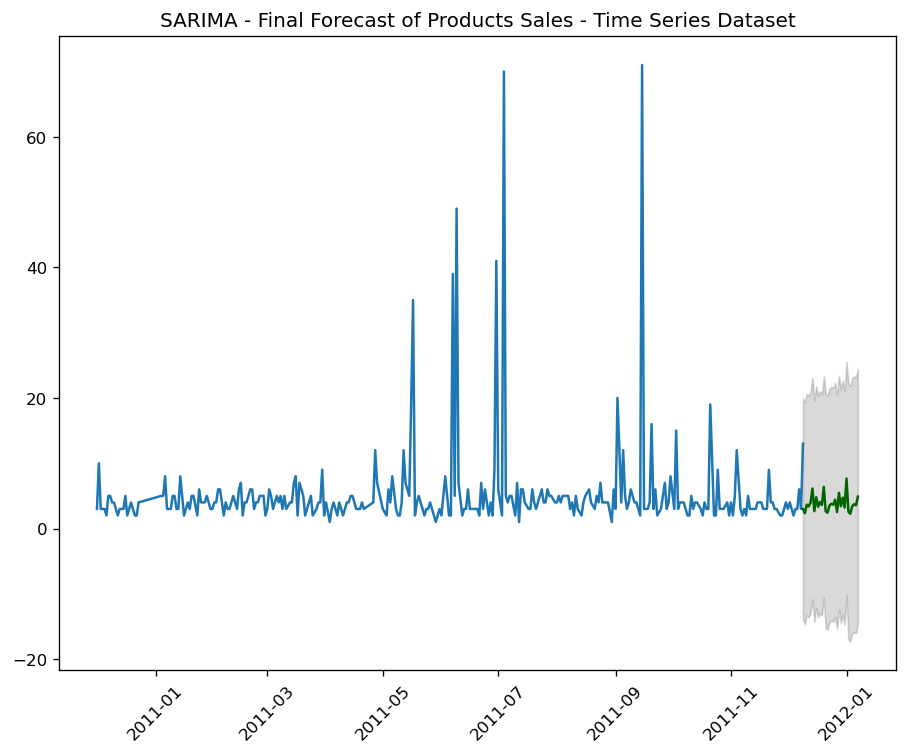

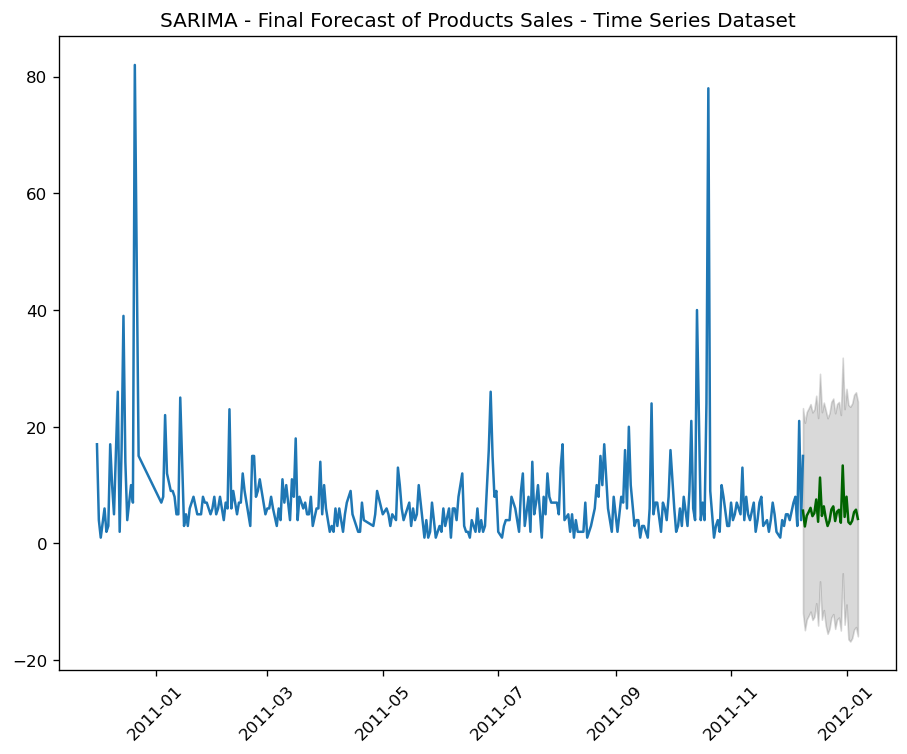

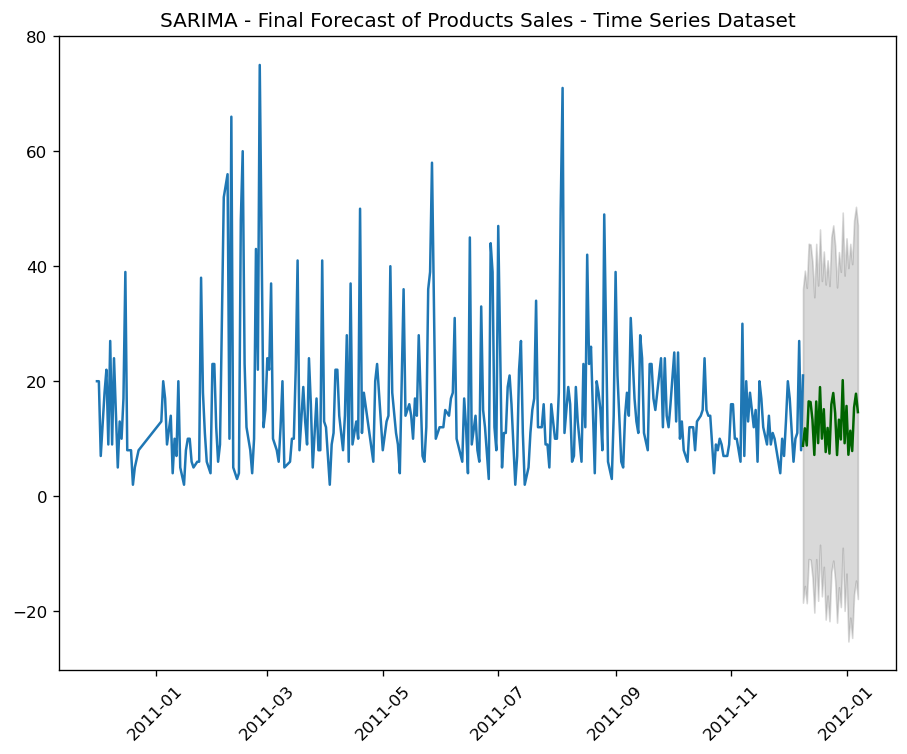

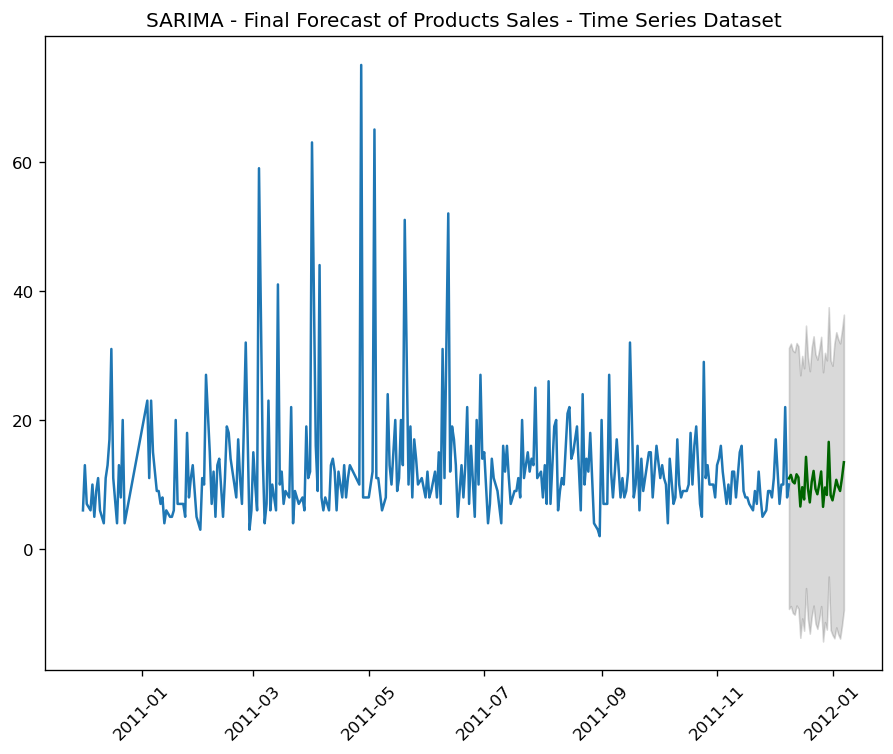

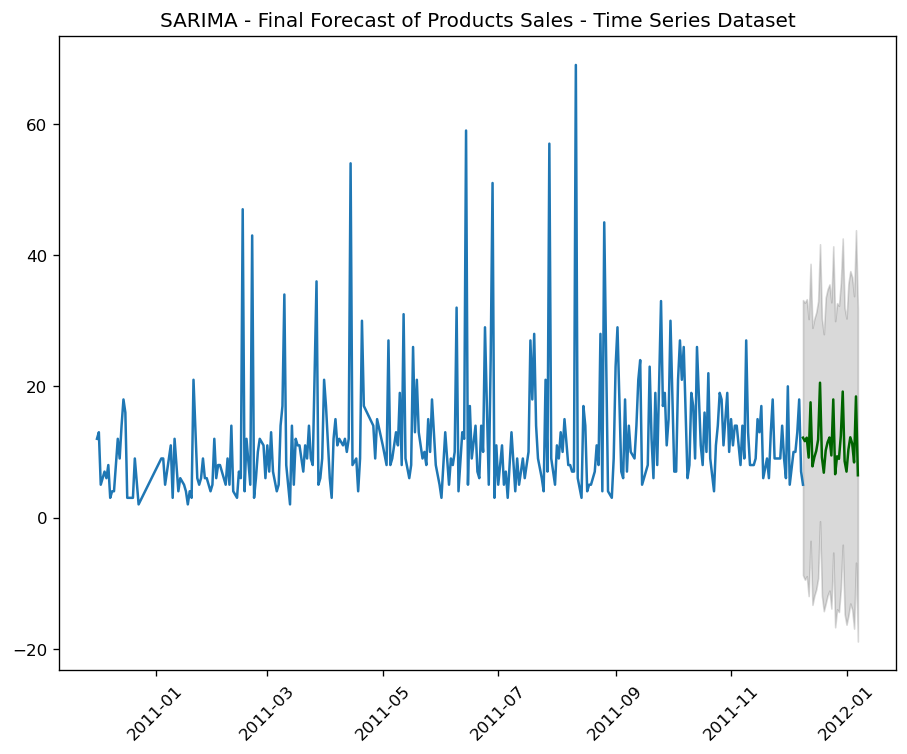

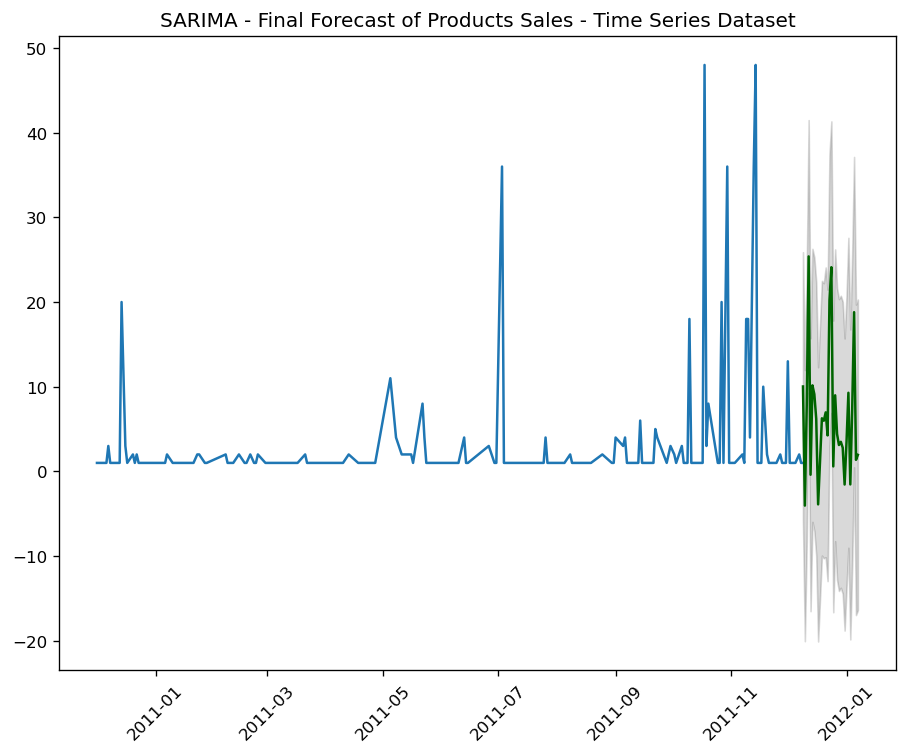

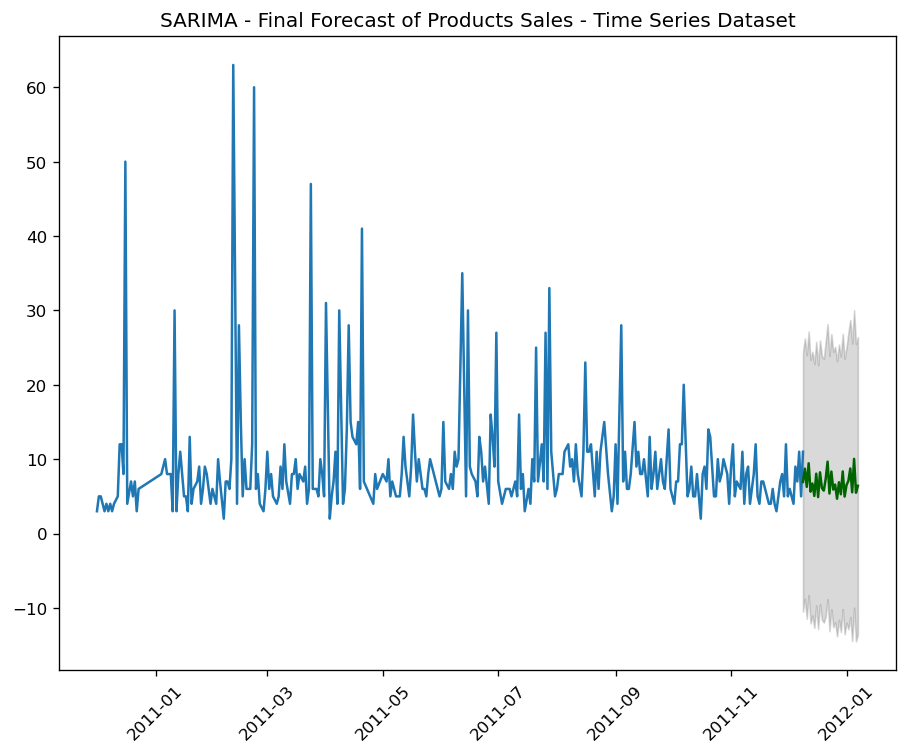

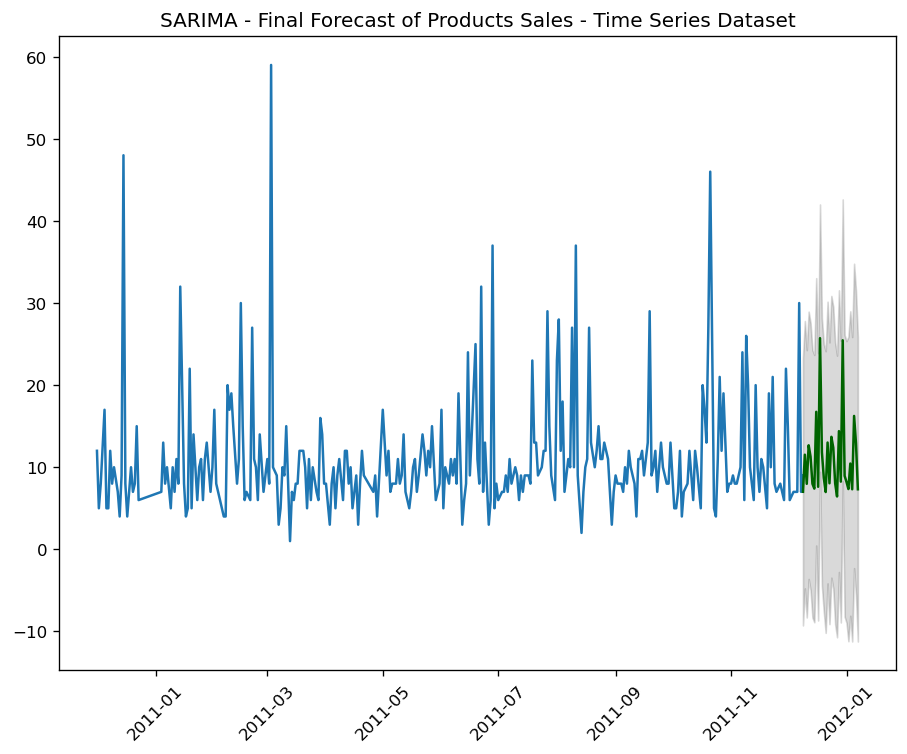

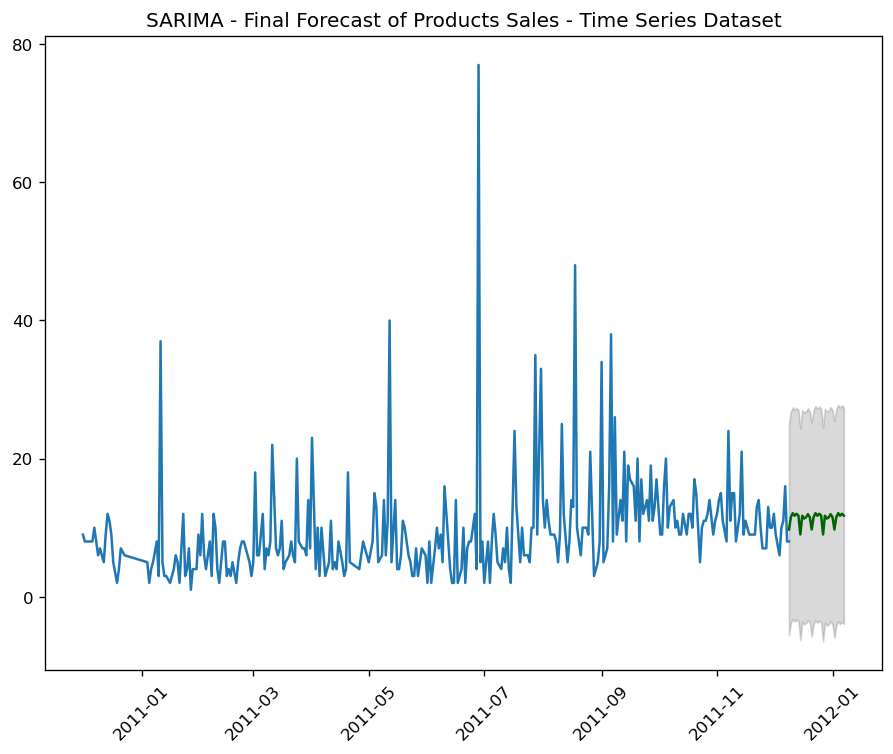

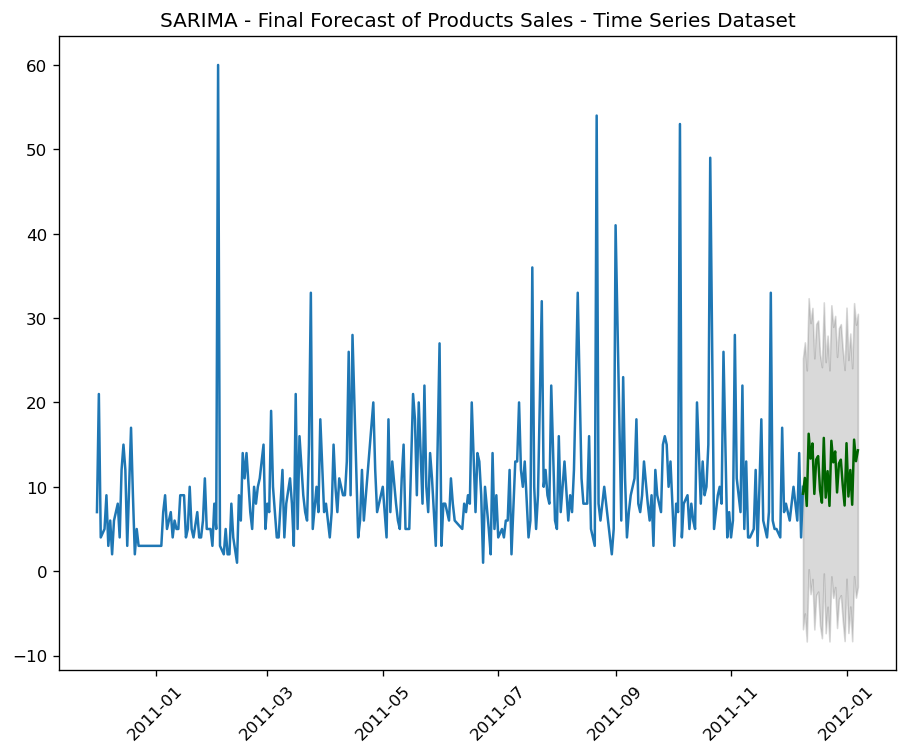

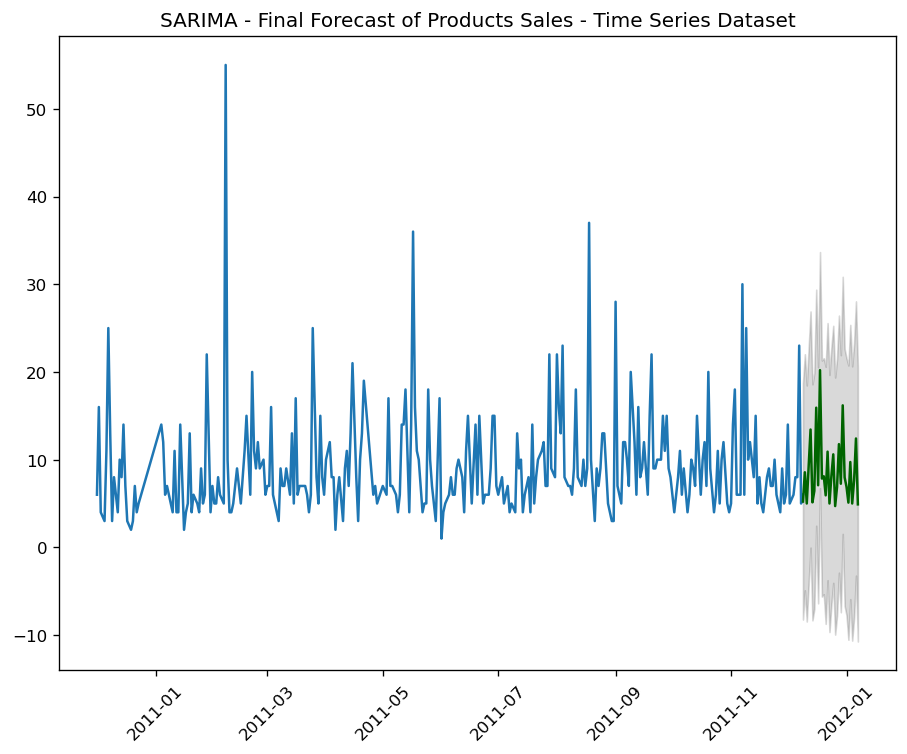

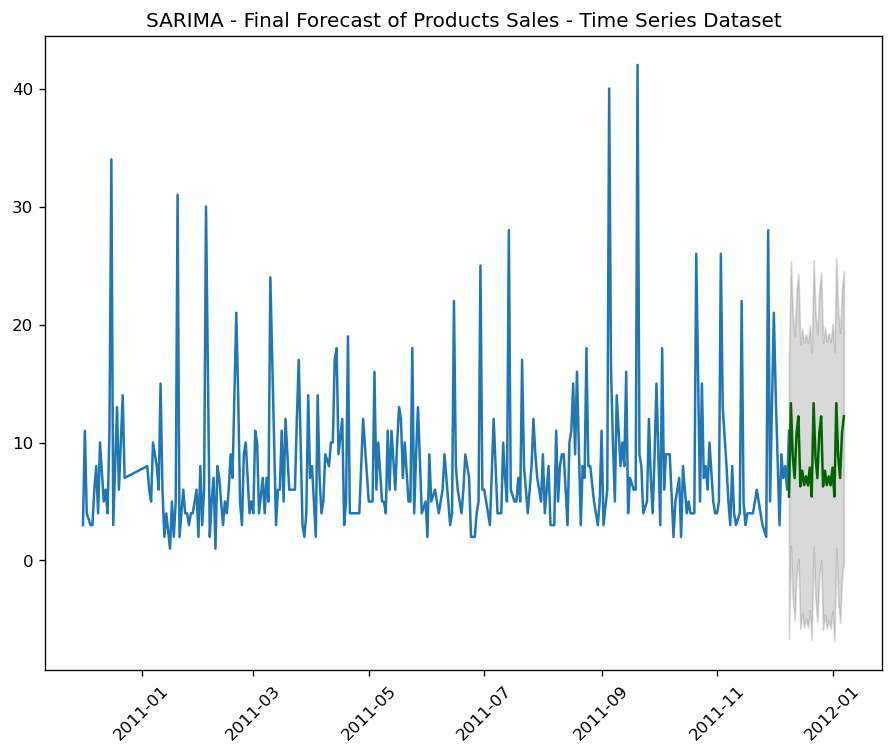

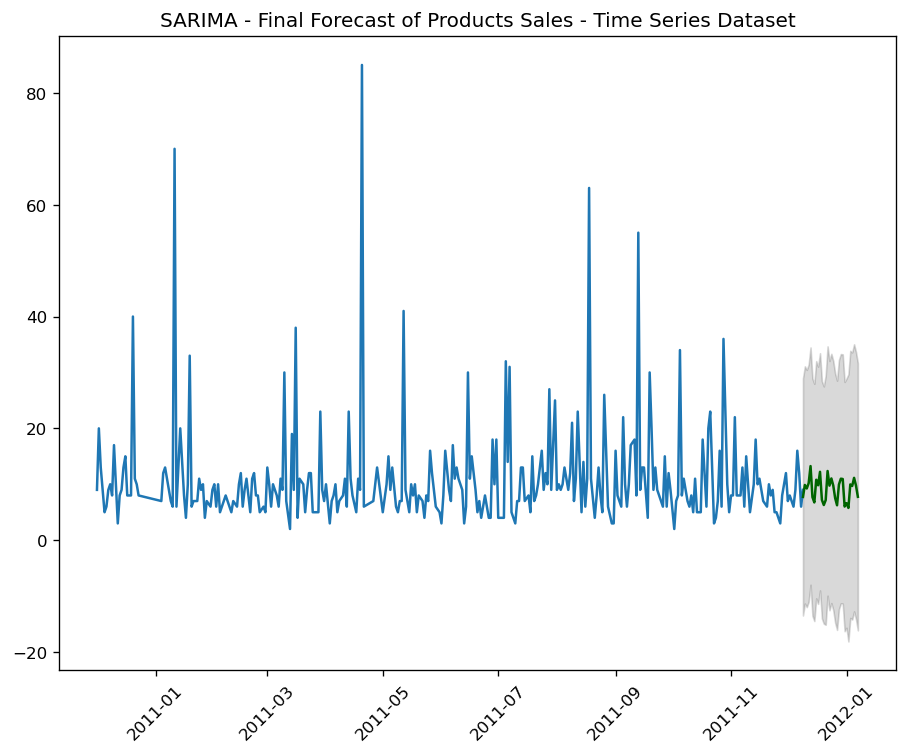

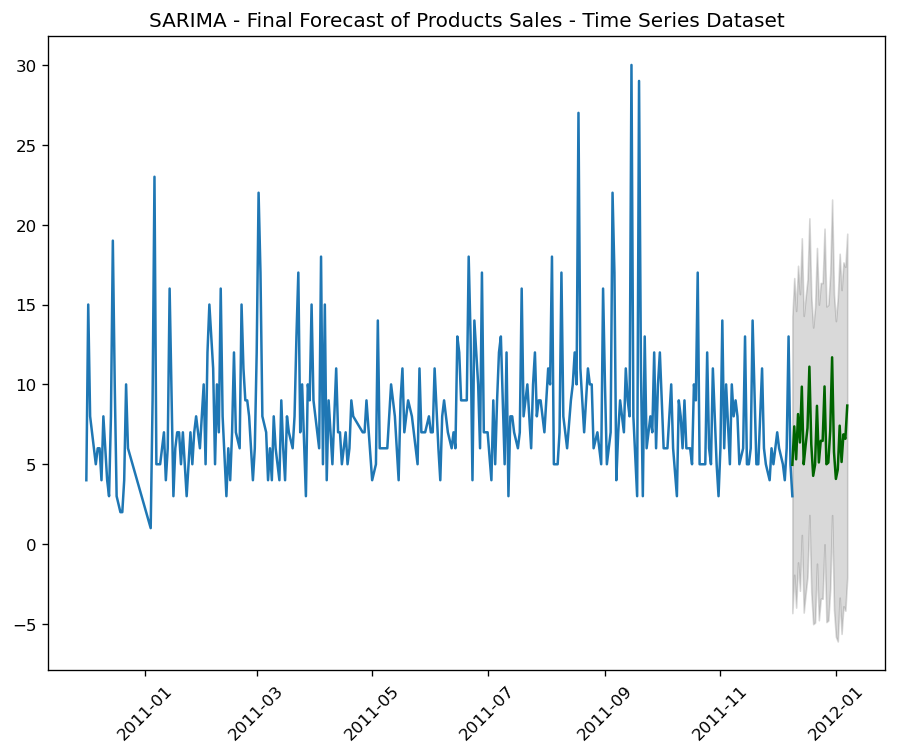

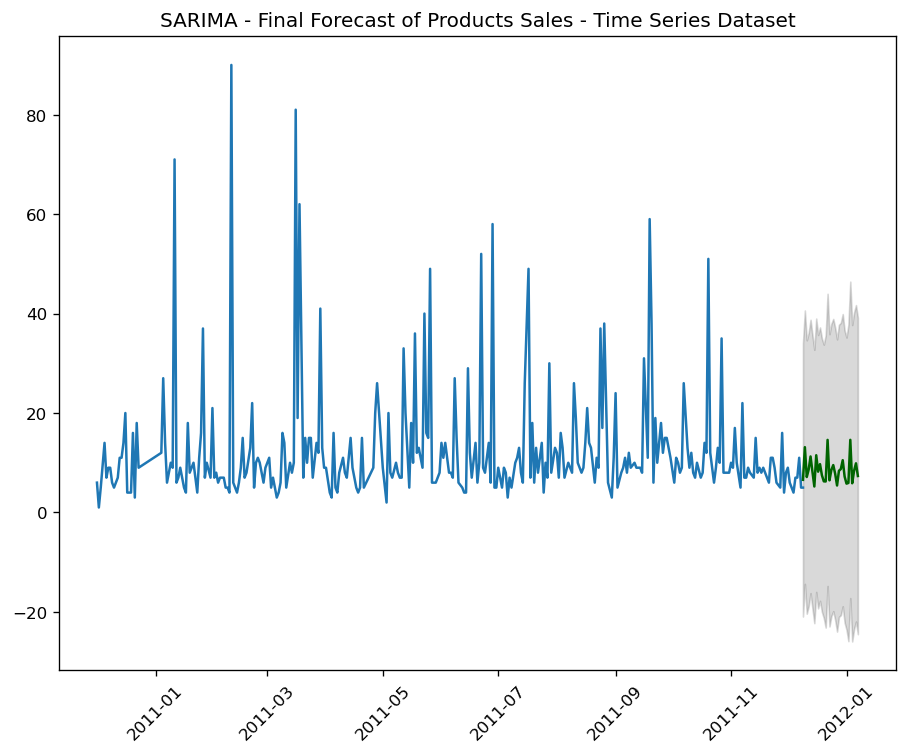

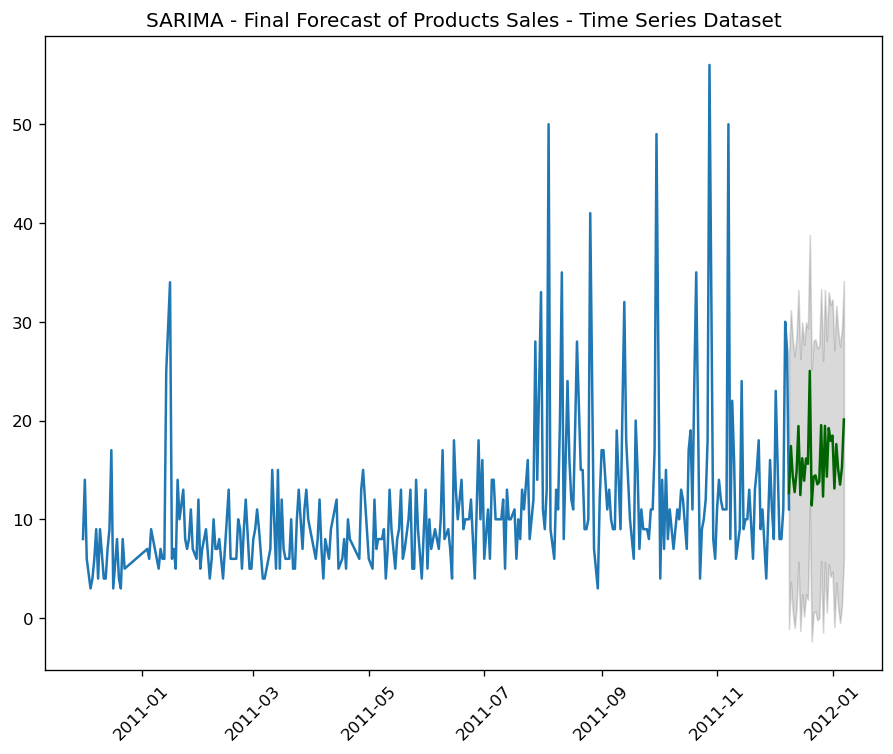

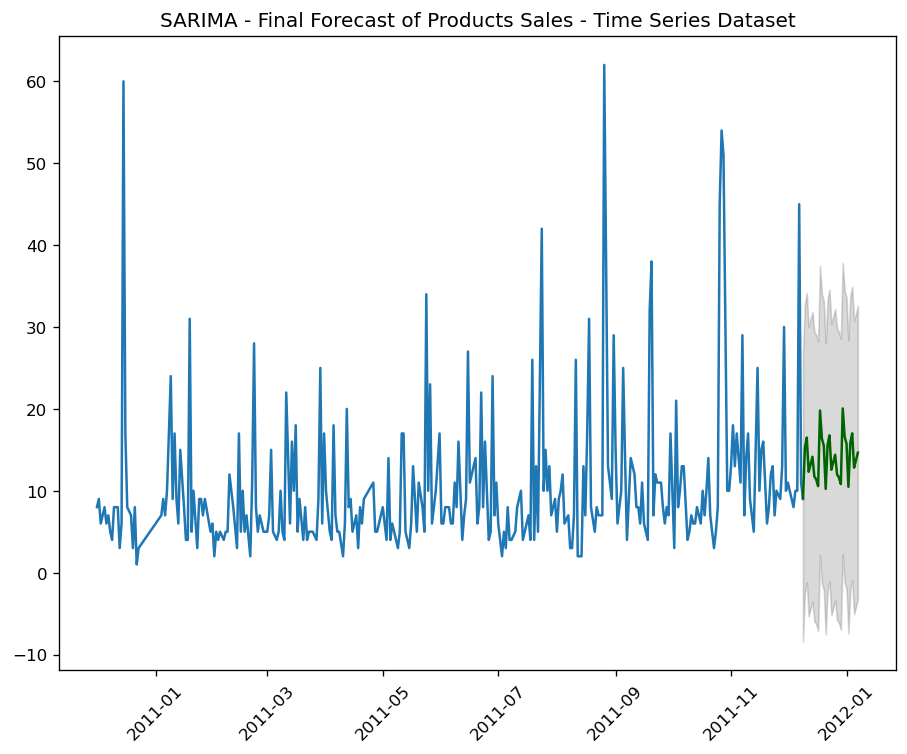

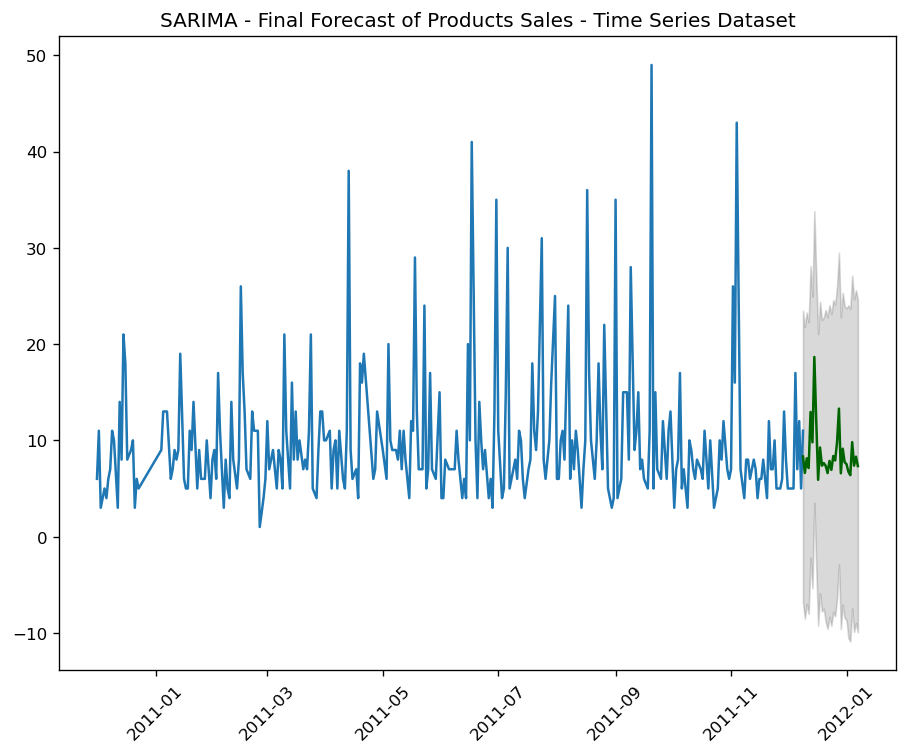

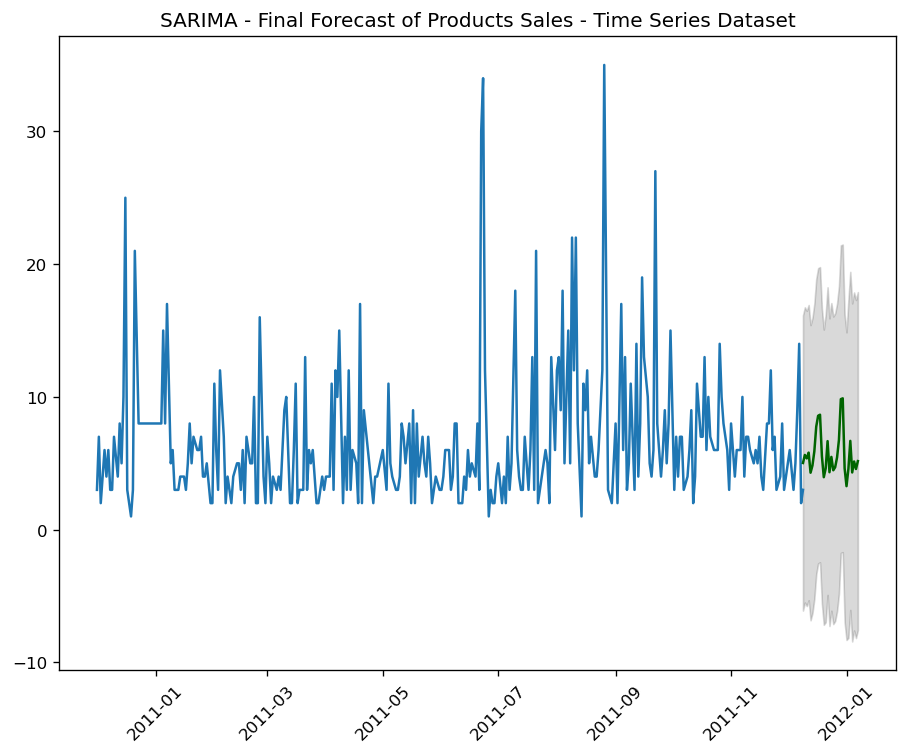

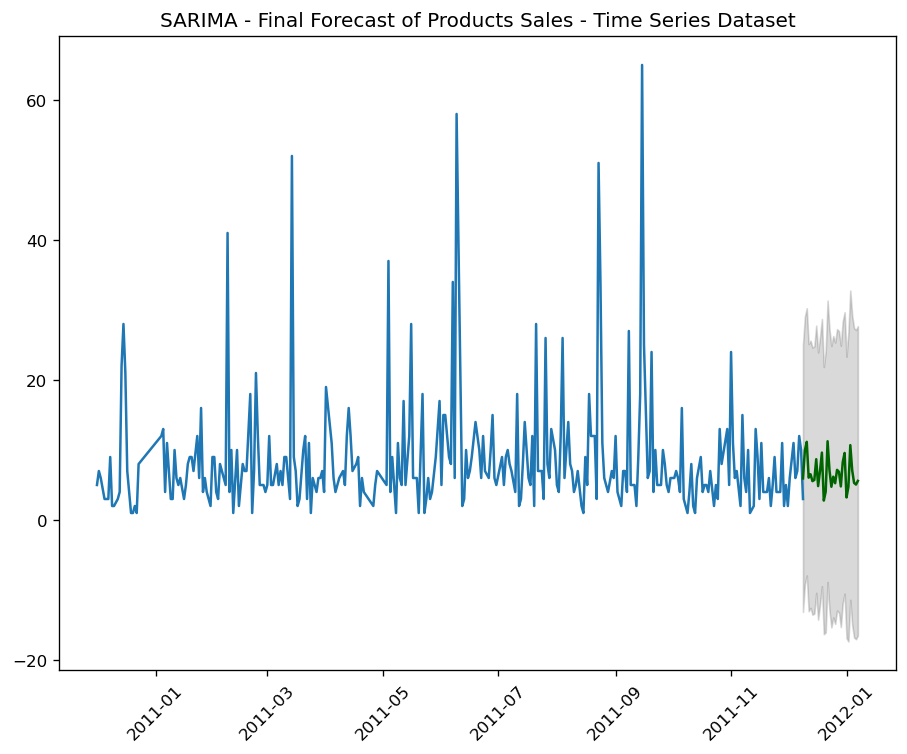

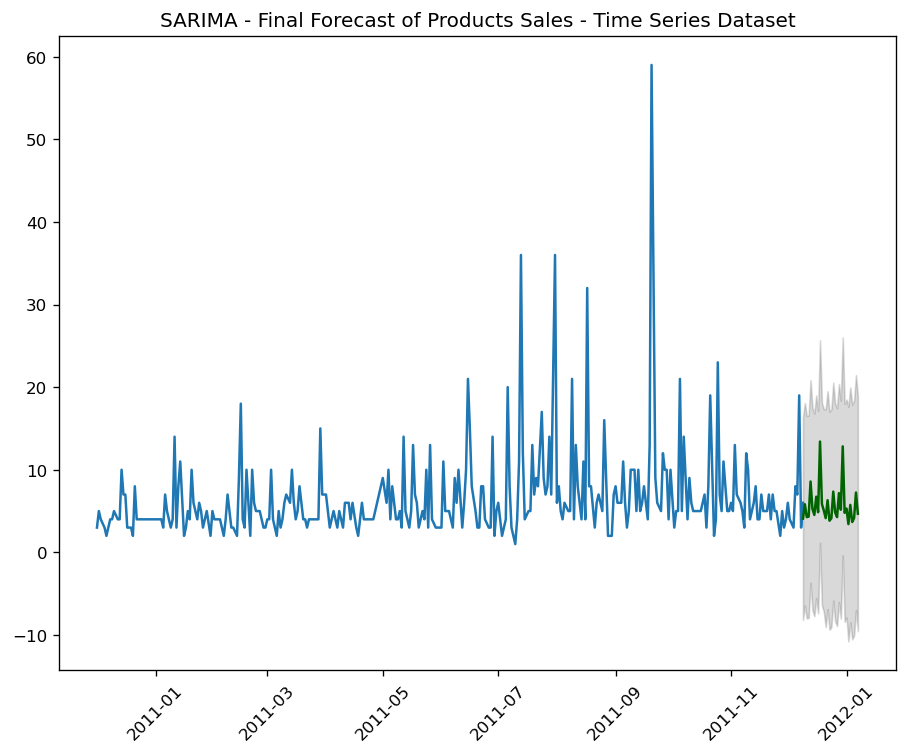

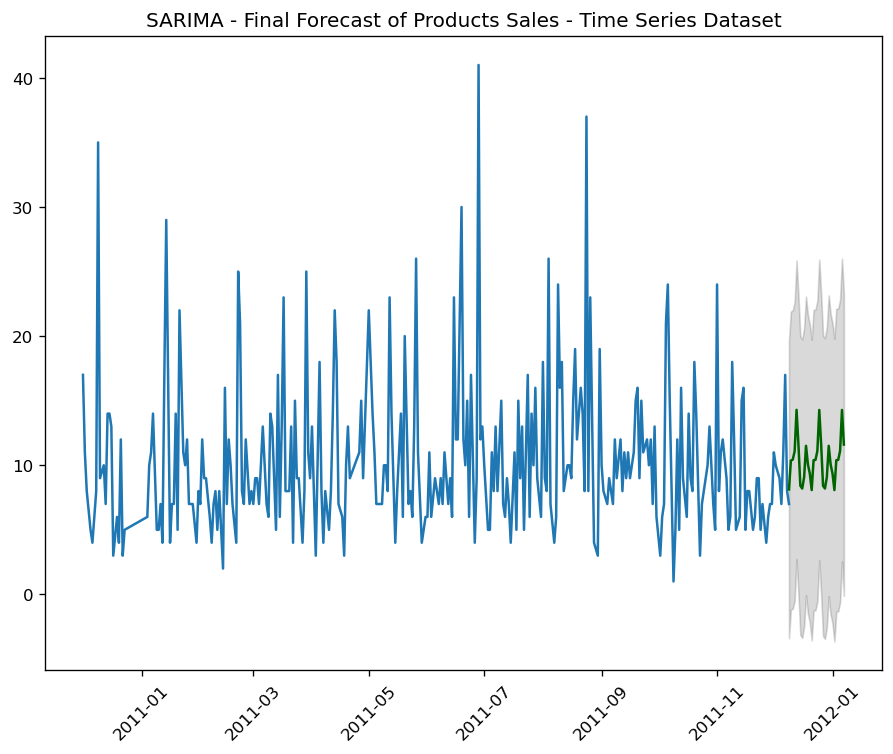

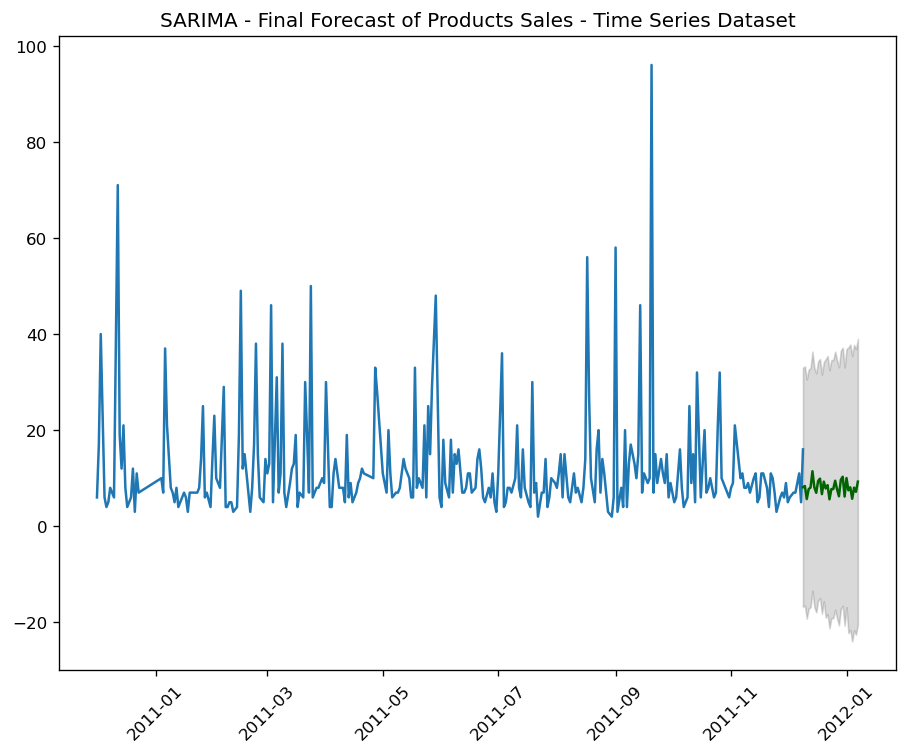

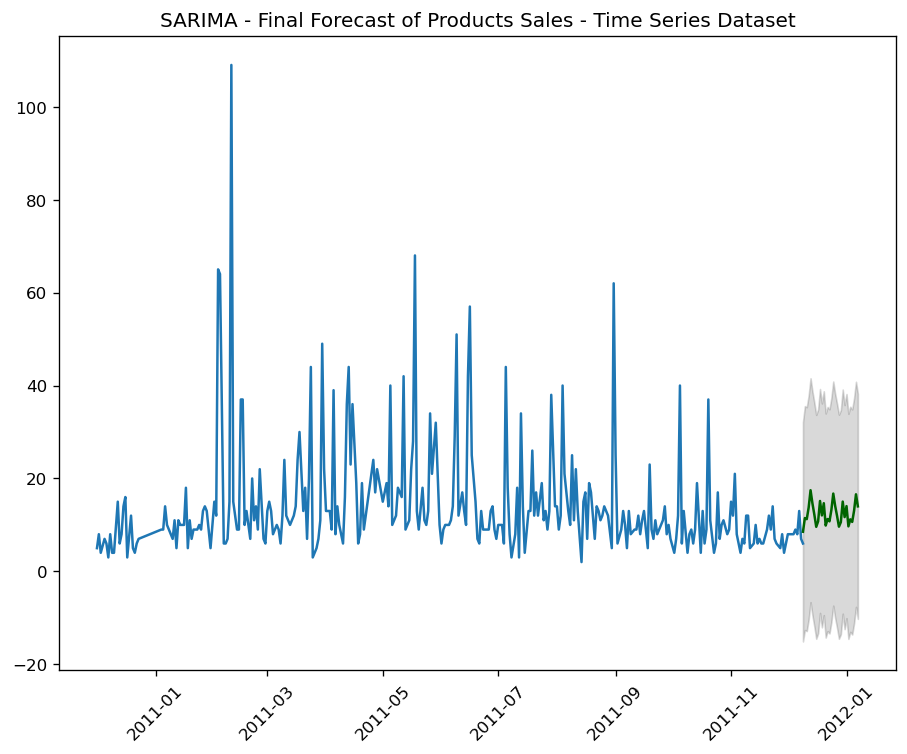

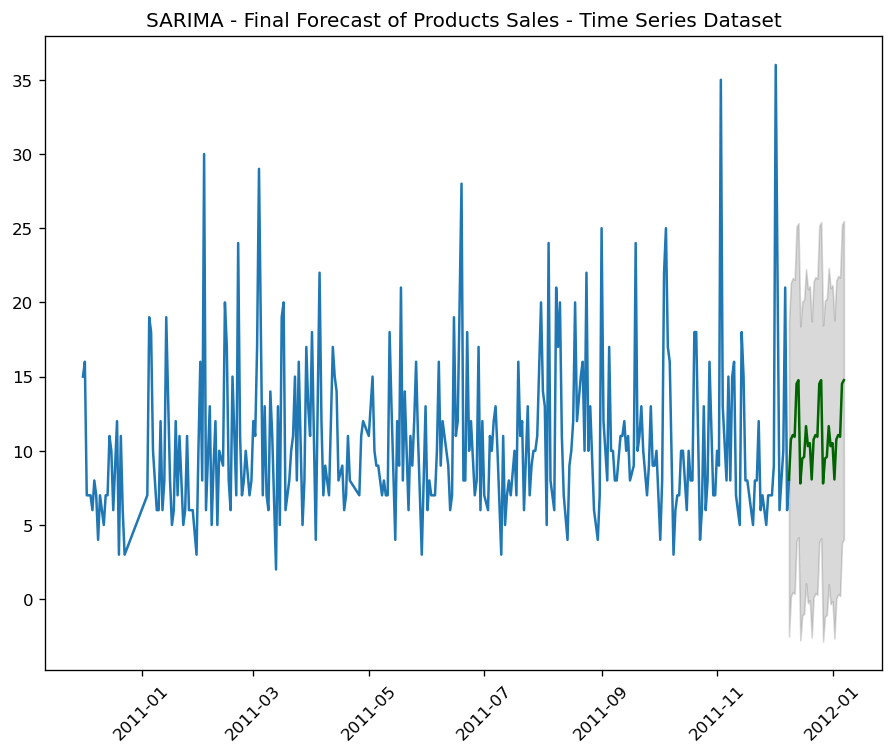

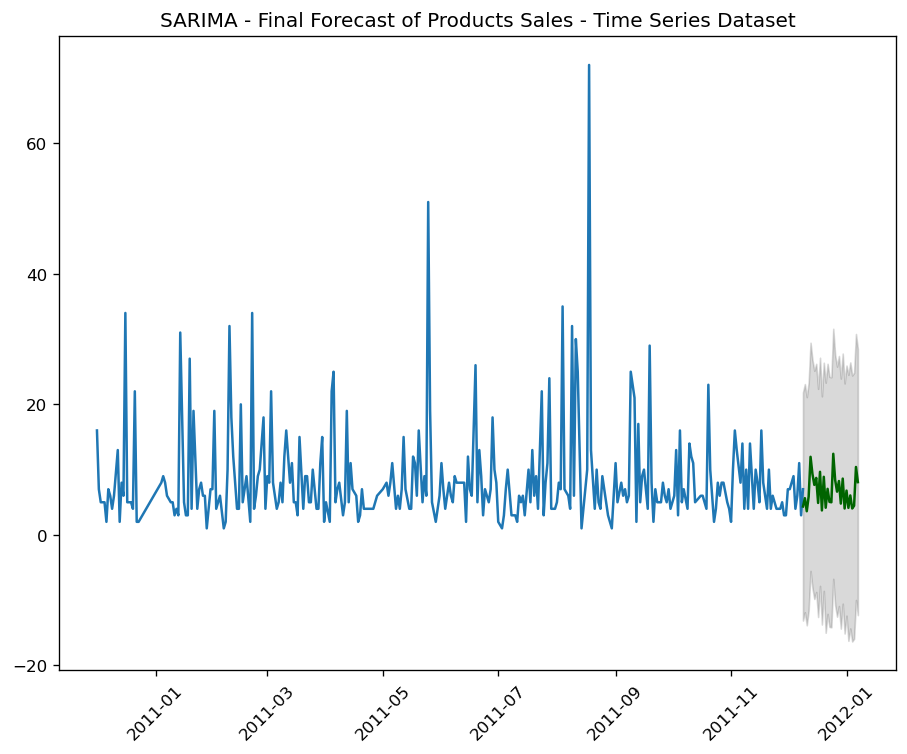

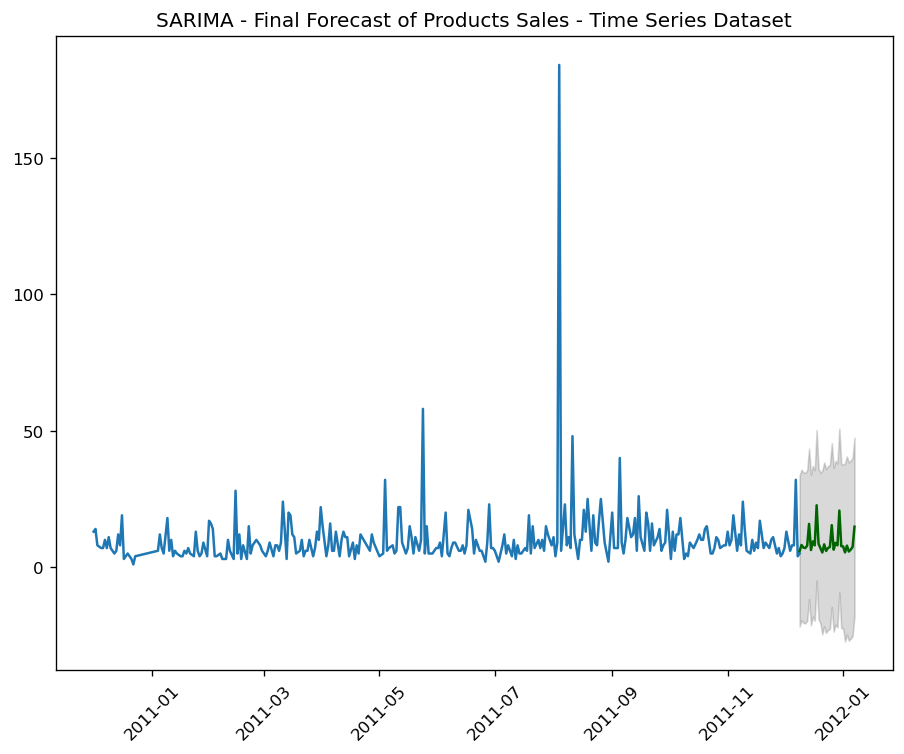

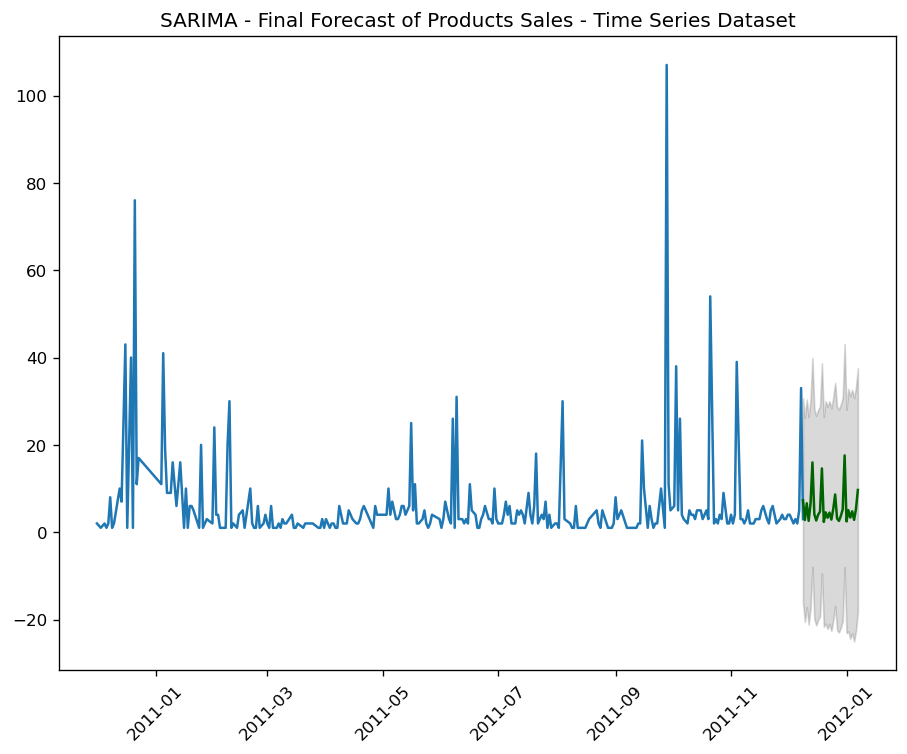

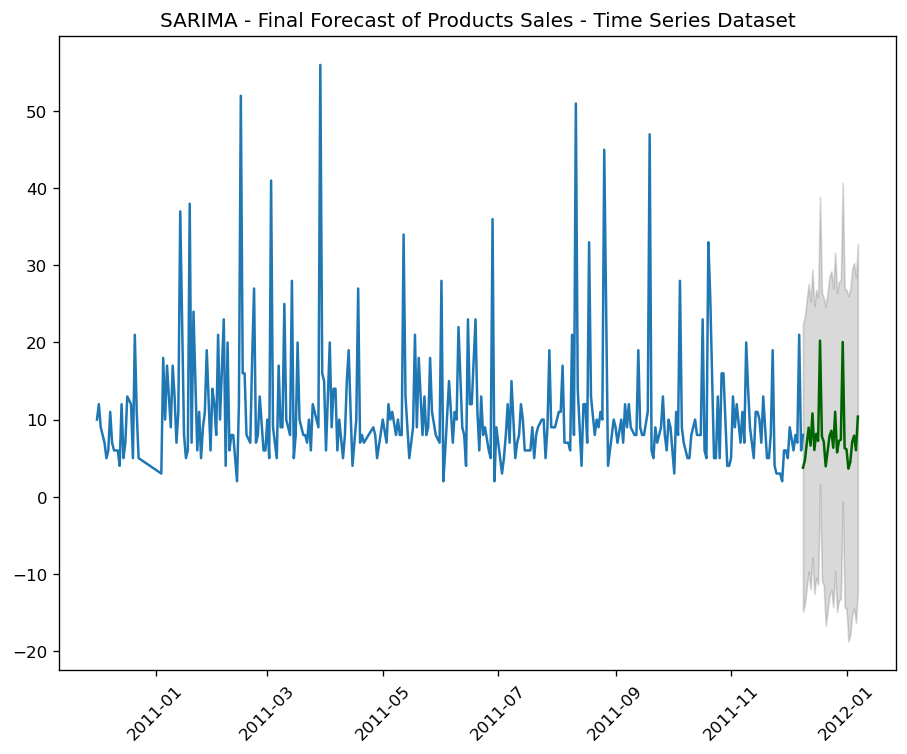

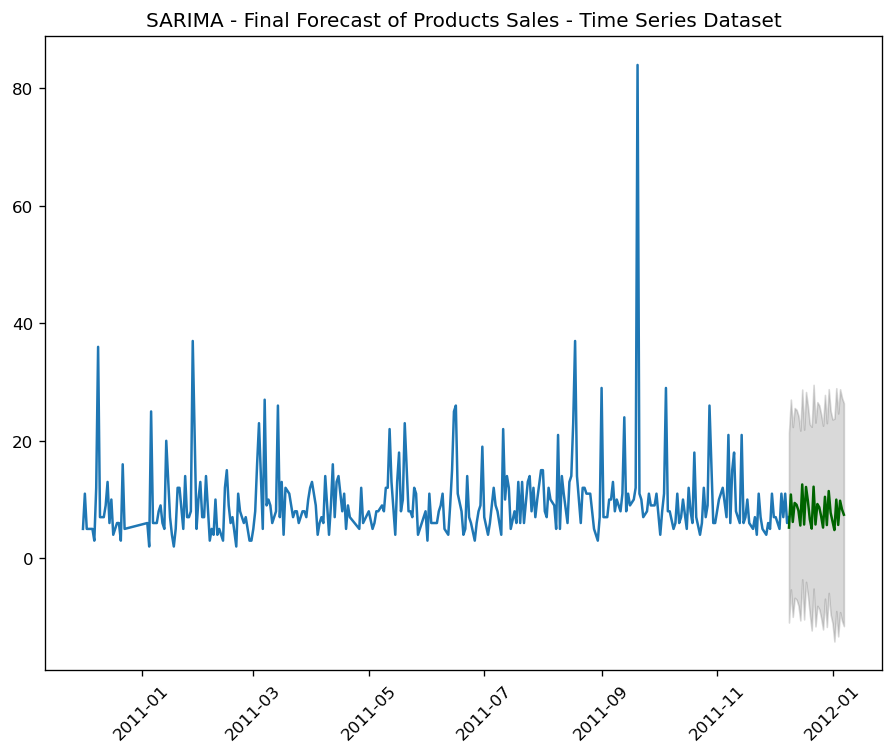

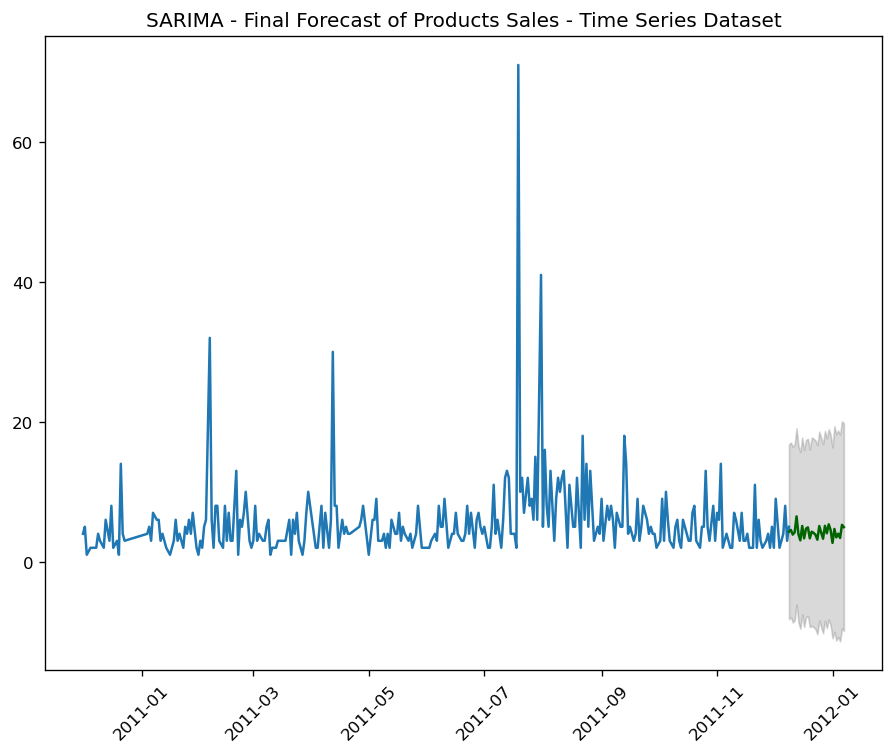

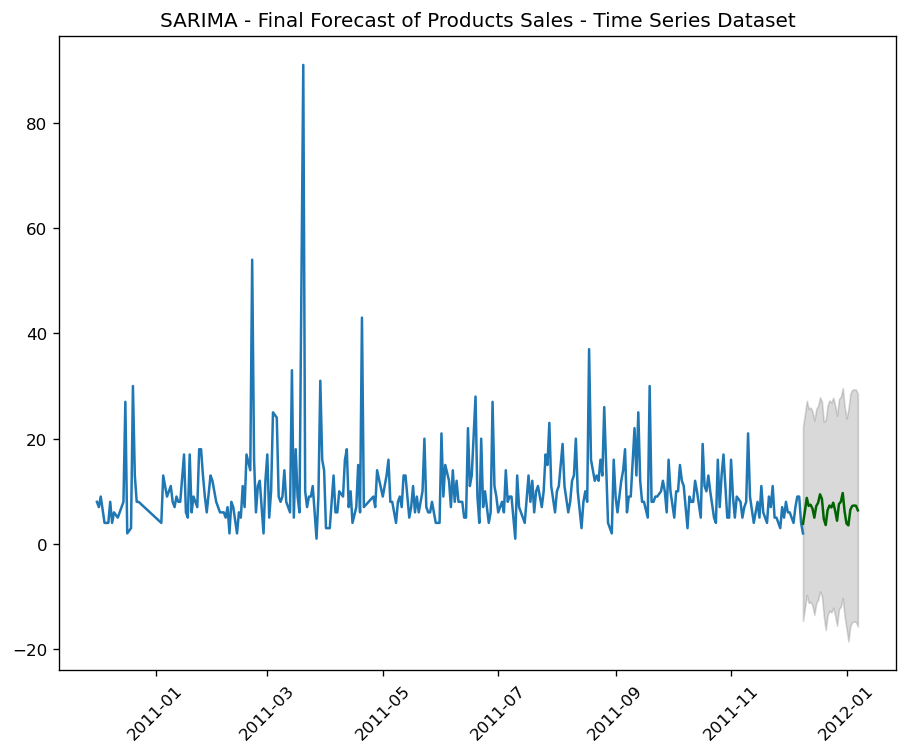

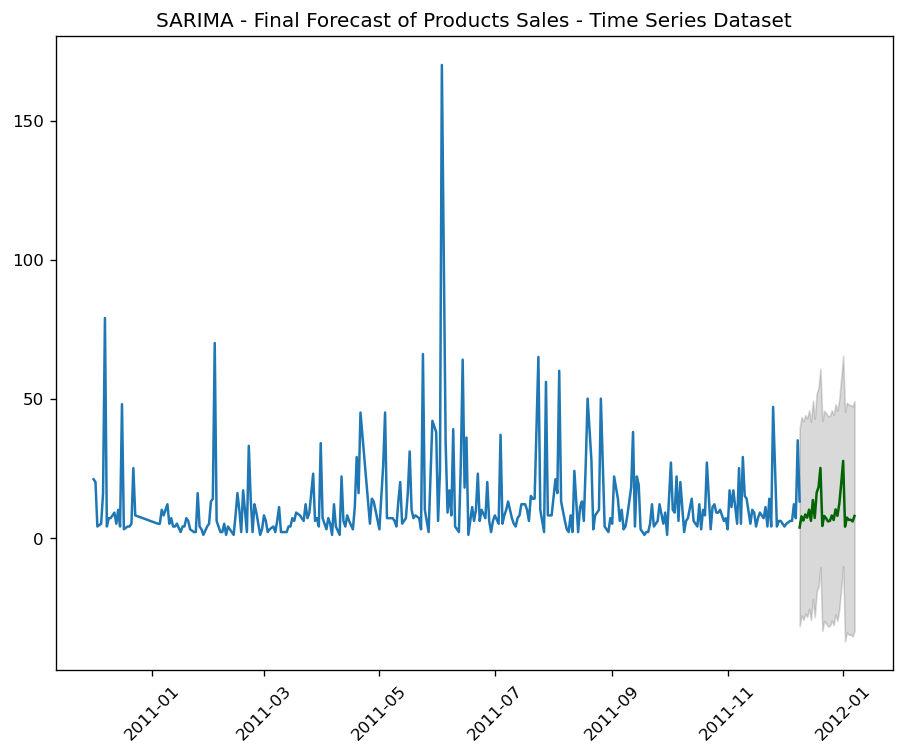

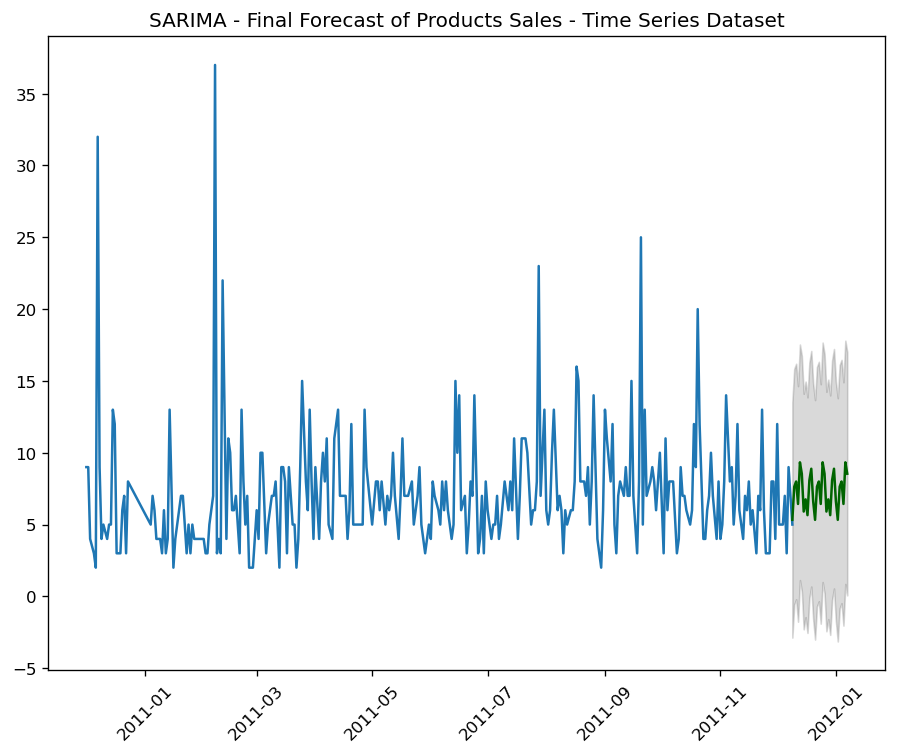

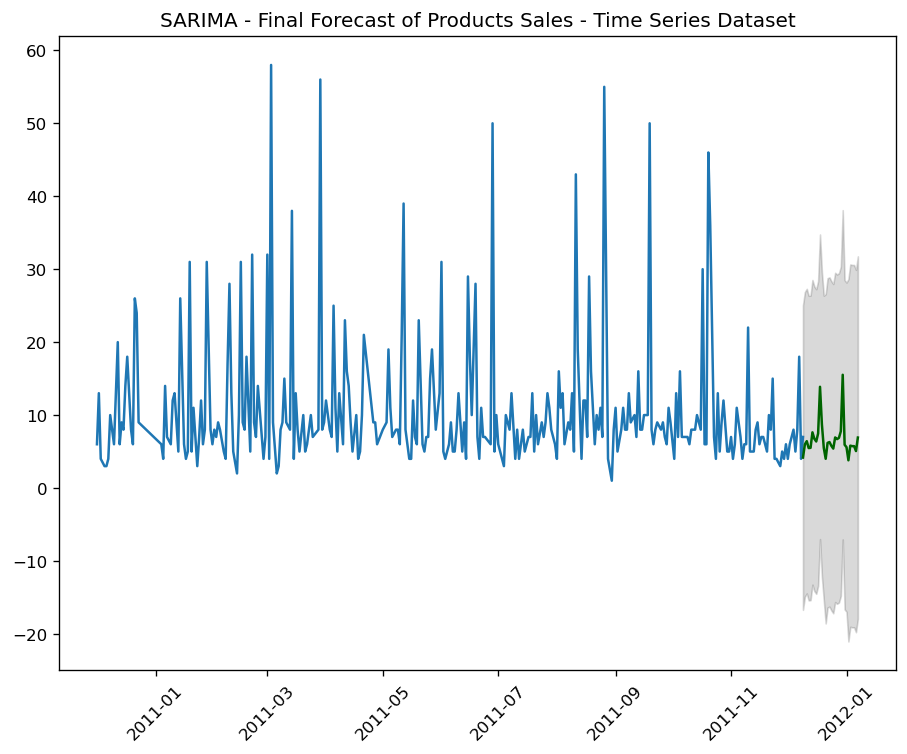

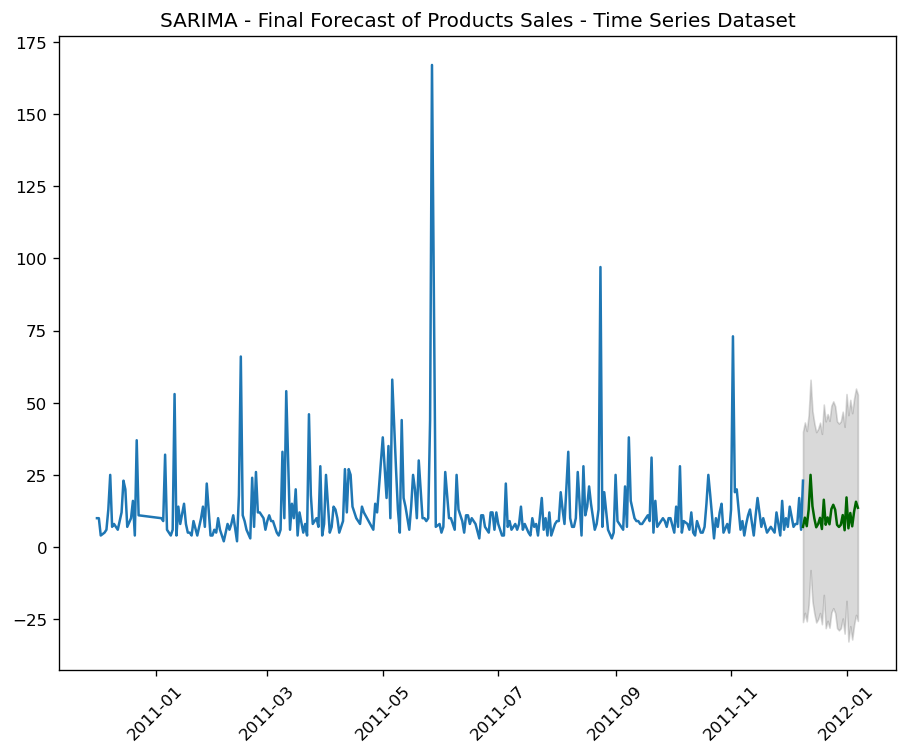

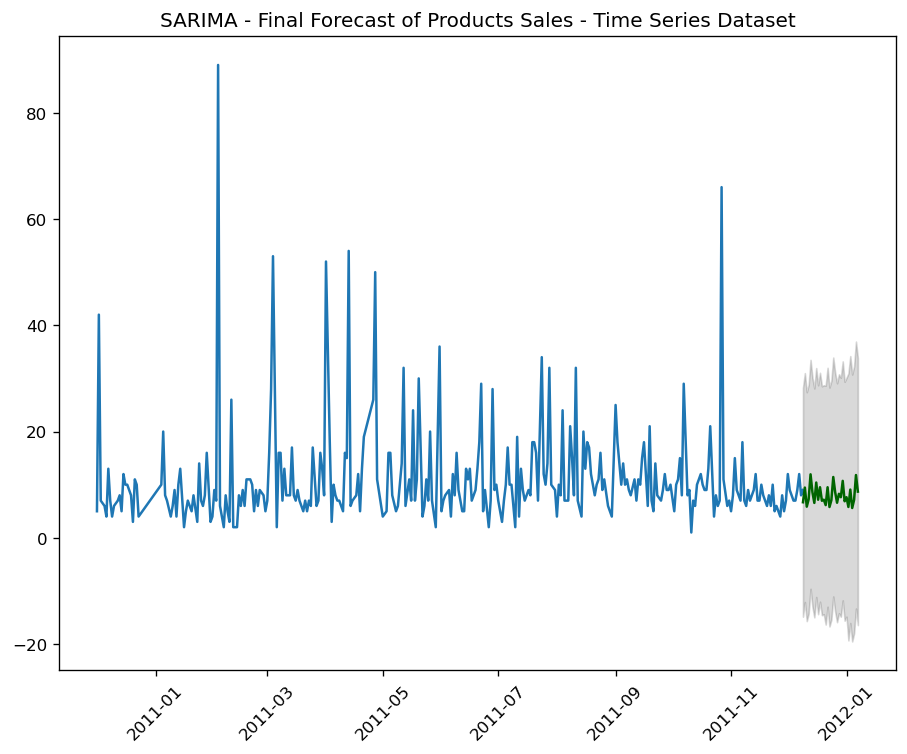

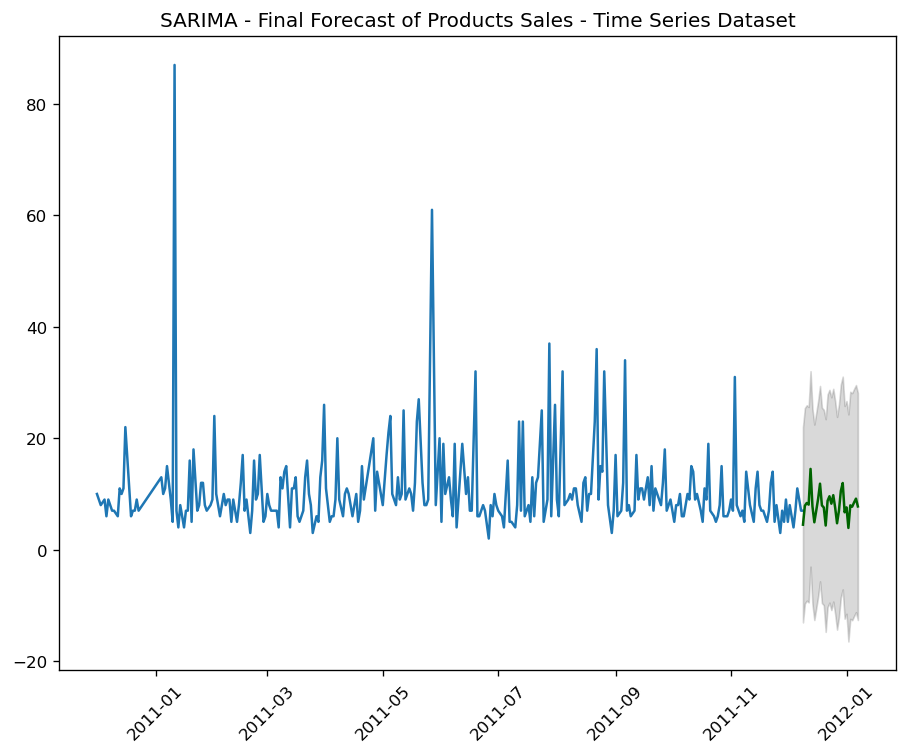

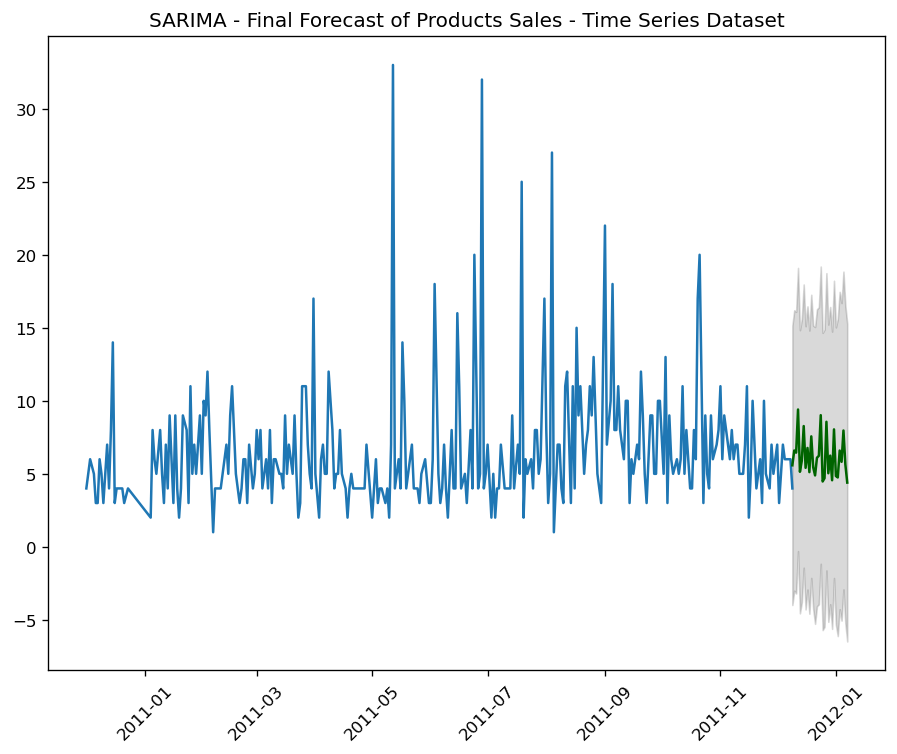

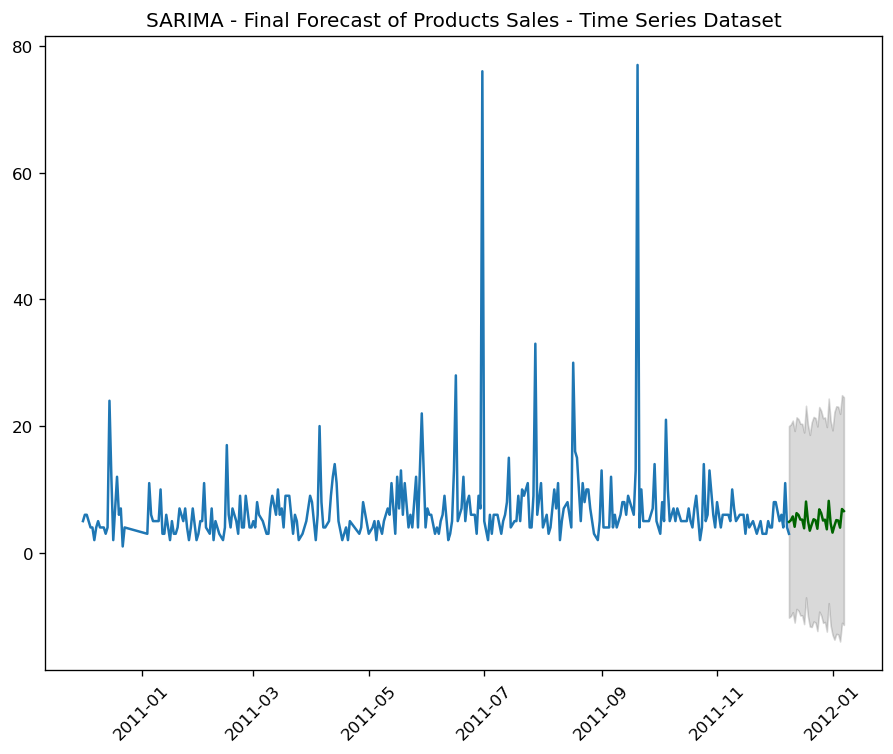

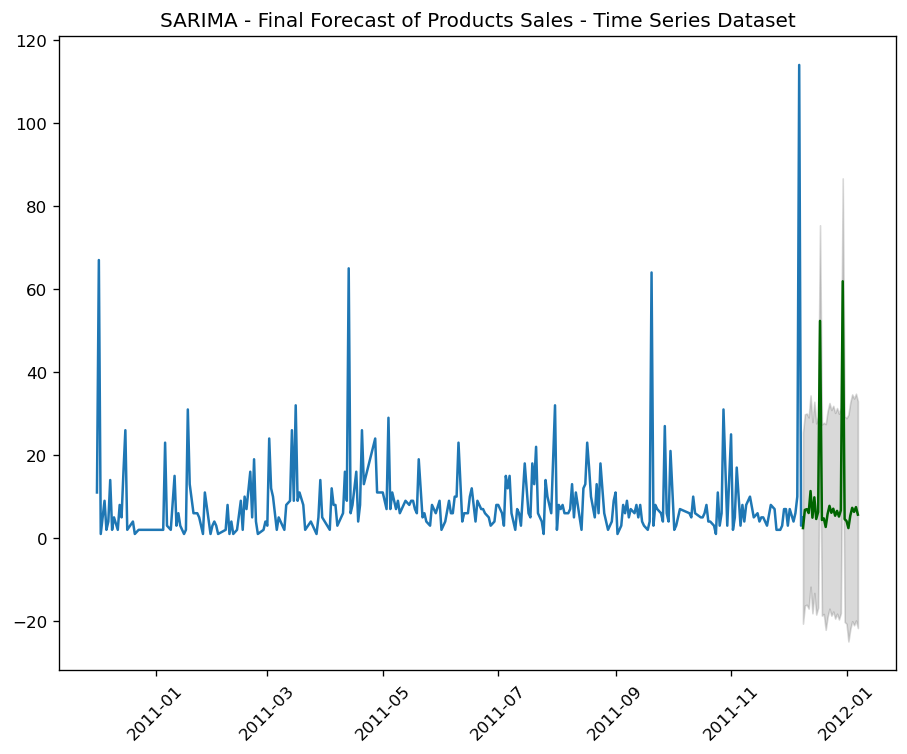

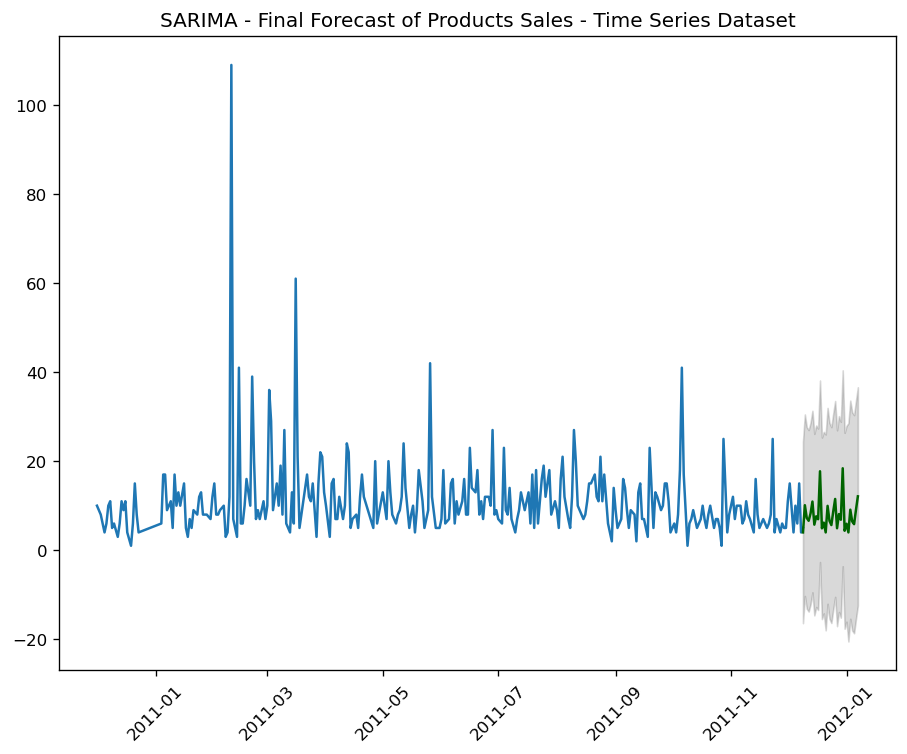

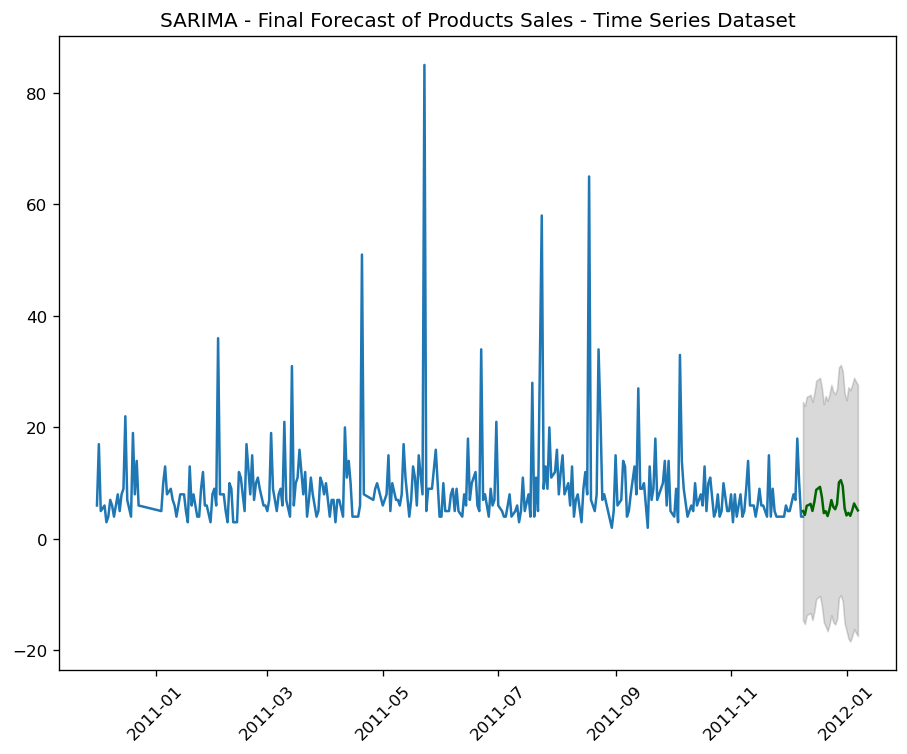

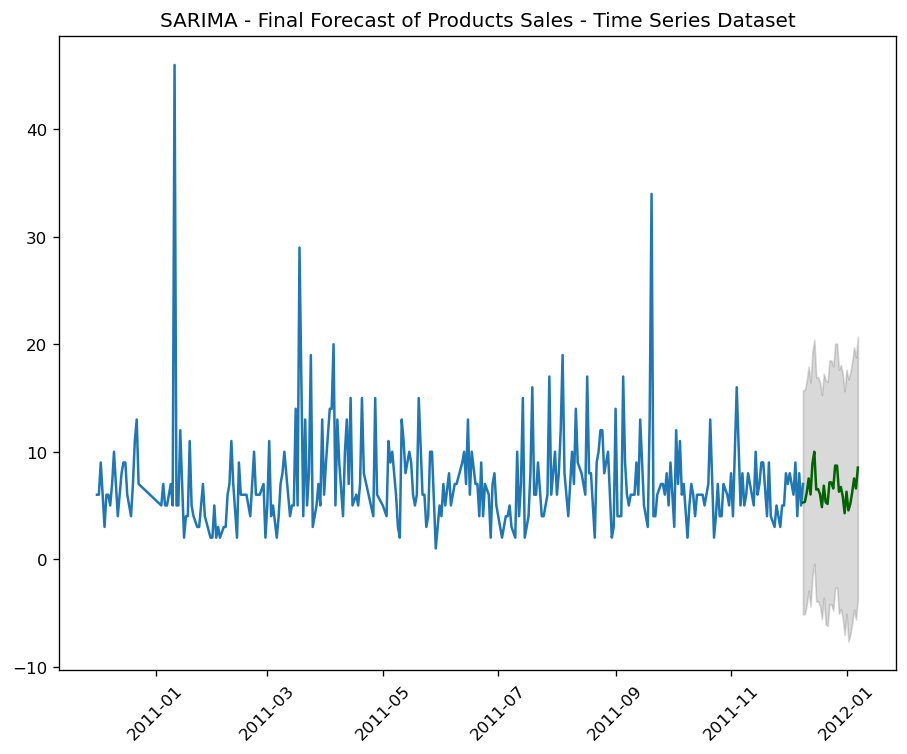

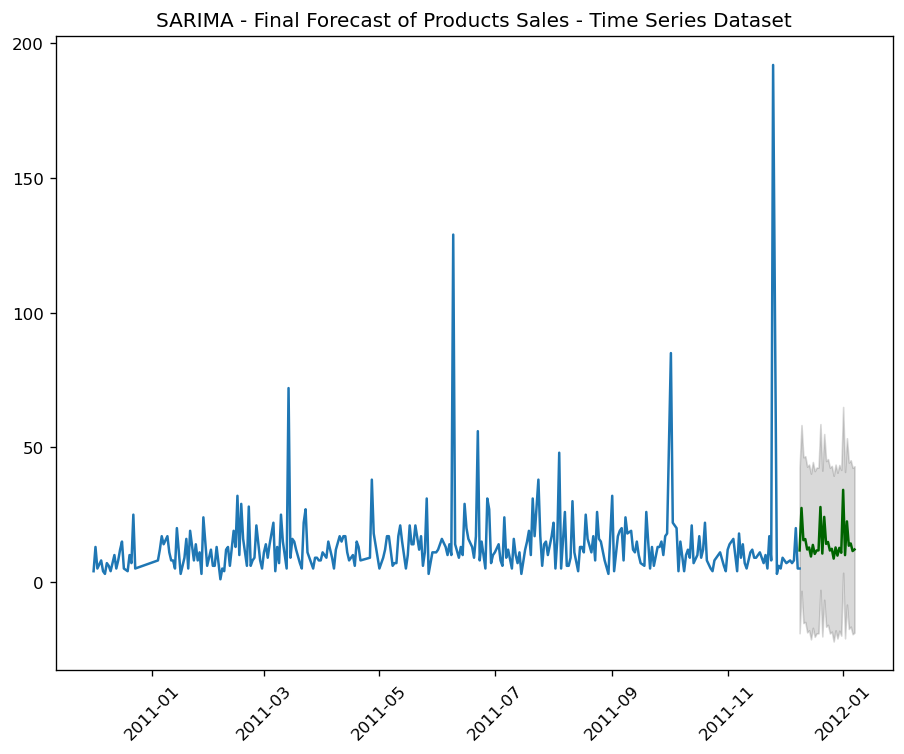

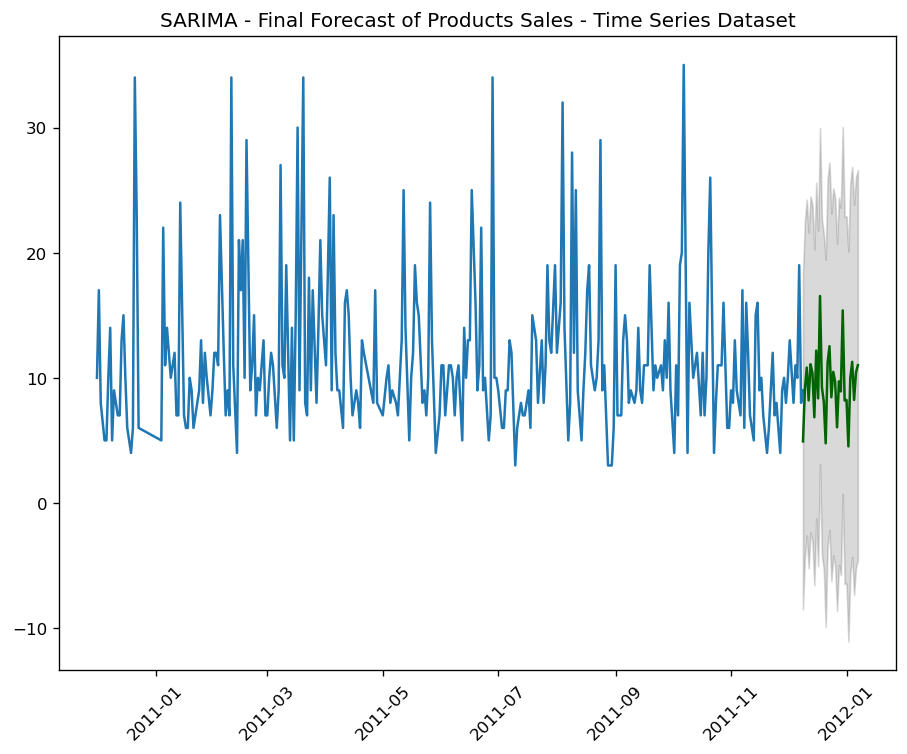

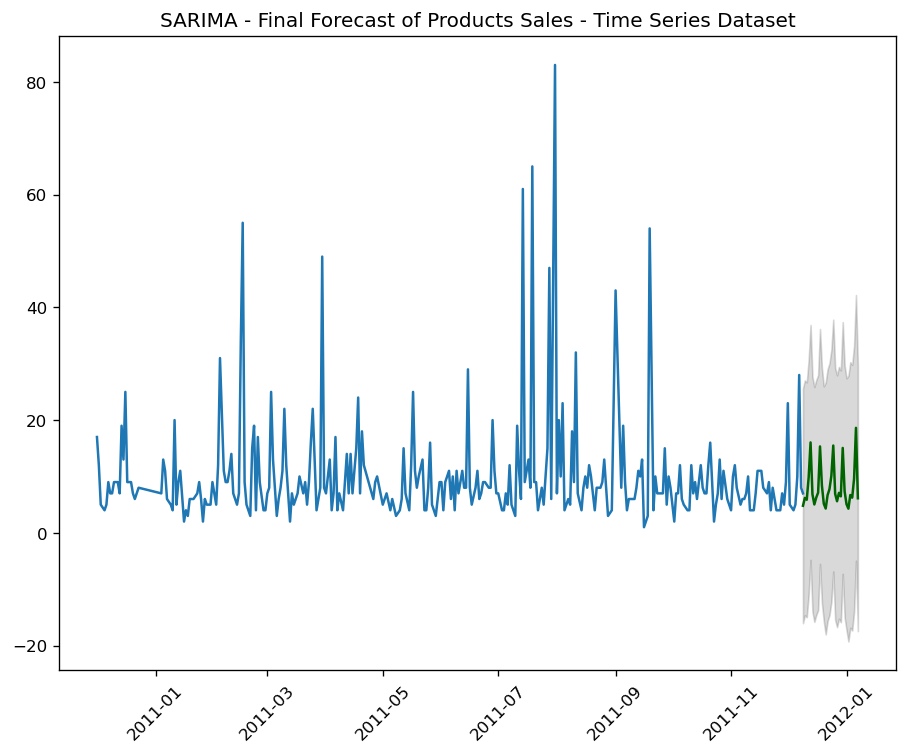

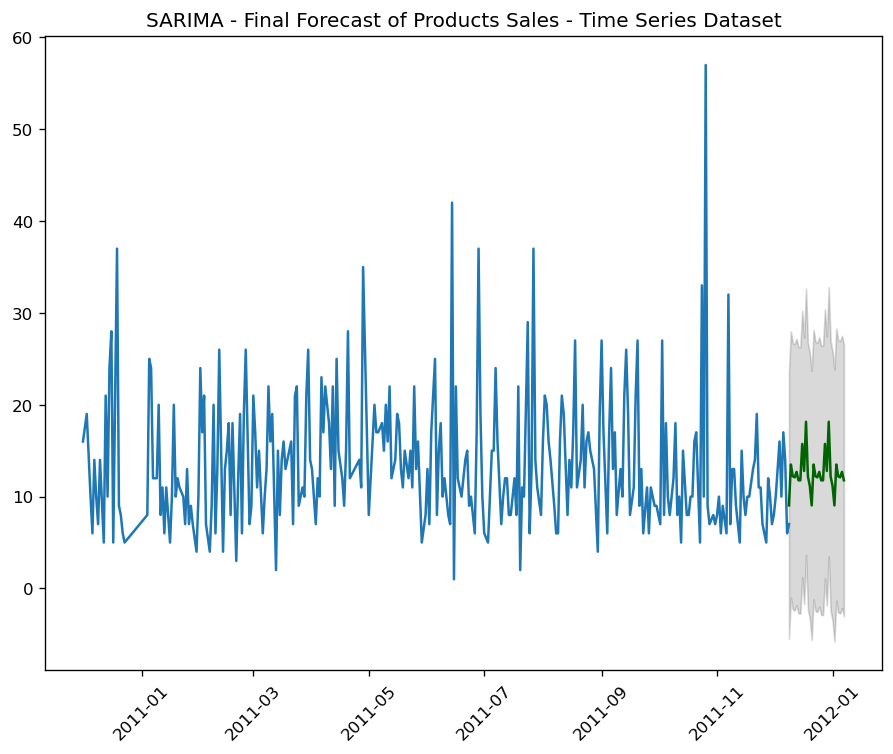

In [70]:
for i in range(best_clusters):
    globals()['fitted_%s' % i]=forecast_m(globals()['smodel_%s' % i],globals()['data_%s' % i])

In [71]:
forecast=pd.DataFrame()
for i in range(best_clusters):
    forecast=pd.concat([forecast,df[df['ClusterID']==i]],axis=0)

In [72]:
forecast=forecast.reset_index().drop(columns=['index'],axis=1)

In [73]:
forecast=forecast.drop(columns=['InvoiceNo','Description','Quantity','InvoiceDate','UnitPrice','Country','CustomerID'],axis=1)

In [74]:
for i in range(best_clusters):
    globals()['forecasted_%s' % i]=pd.DataFrame(globals()['fitted_%s' % i]).reset_index().drop(columns=['index'],axis=1)

In [75]:
s=pd.DataFrame(columns=range(30))
s.columns=pd.DataFrame(fitted_0).index

In [76]:
s=pd.DataFrame()
       

In [77]:
for i in range(best_clusters):
    j=0
    while(j<len(forecast[forecast['ClusterID']==i])):
          s=pd.concat([s,globals()['forecasted_%s' % i].T],axis=0)
          j+=1

In [78]:
s.columns=pd.DataFrame(fitted_0).index

In [79]:
s=s.reset_index().drop(columns=['index'],axis=1)

In [80]:
forecast=pd.concat([forecast,s],axis=1)

In [81]:
forecast=forecast.drop(columns=['ClusterID'],axis=1)

In [82]:
forecast

StockCode  2011-12-09 00:00:00  2011-12-10 00:00:00  2011-12-11 00:00:00  \
0        21754             2.974012             2.352141             3.663076   
1        48187             2.974012             2.352141             3.663076   
2        21523             2.974012             2.352141             3.663076   
3        22768             2.974012             2.352141             3.663076   
4        48129             2.974012             2.352141             3.663076   
...        ...                  ...                  ...                  ...   
4013     23483             9.041052            13.494324            12.216459   
4014     23454             9.041052            13.494324            12.216459   
4015     47016             9.041052            13.494324            12.216459   
4016    79161A             9.041052            13.494324            12.216459   
4017     71477             9.041052            13.494324            12.216459   

      2011-12-12 00:00:00  2011-12-13 00:00:00  2011-12-14 00:00:00  \
0                3.378129             3.974012             6.135345   
1                3.378129             3.974012             6.135345   
2                3.378129             3.974012             6.135345   
3                3.378129             3.974012             6.135345   
4                3.378129             3.974012             6.135345   
...                   ...                  ...                  ...   
4013            12.096054            12.690202            11.774520   
4014            12.096054            12.690202            11.774520   
4015            12.096054            12.690202            11.774520   
4016            12.096054            12.690202            11.774520   
4017            12.096054            12.690202            11.774520   

      2011-12-15 00:00:00  2011-12-16 00:00:00  2011-12-17 00:00:00  \
0                2.663076             4.801908             3.352141   
1                2.663076             4.801908             3.352141   
2                2.663076             4.801908             3.352141   
3                2.663076             4.801908             3.352141   
4                2.663076             4.801908             3.352141   
...                   ...                  ...                  ...   
4013            11.767629            15.738250            12.790592   
4014            11.767629            15.738250            12.790592   
4015            11.767629            15.738250            12.790592   
4016            11.767629            15.738250            12.790592   
4017            11.767629            15.738250            12.790592   

      2011-12-18 00:00:00  2011-12-19 00:00:00  2011-12-20 00:00:00  \
0                4.051976             3.621871             6.369237   
1                4.051976             3.621871             6.369237   
2                4.051976             3.621871             6.369237   
3                4.051976             3.621871             6.369237   
4                4.051976             3.621871             6.369237   
...                   ...                  ...                  ...   
4013            18.151373            12.194195            11.175799   
4014            18.151373            12.194195            11.175799   
4015            18.151373            12.194195            11.175799   
4016            18.151373            12.194195            11.175799   
4017            18.151373            12.194195            11.175799   

      2011-12-21 00:00:00  2011-12-22 00:00:00  2011-12-23 00:00:00  \
0                2.639103             2.429580             3.534342   
1                2.639103             2.429580             3.534342   
2                2.639103             2.429580             3.534342   
3                2.639103             2.429580             3.534342   
4                2.639103             2.429580             3.534342   
...                   ...                  ... 

In [83]:
forecast.to_csv('forecast.csv')